# Importstatements


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pingouin as pg
from factor_analyzer import FactorAnalyzer 
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm

# 1. Importing and merging datasets

In [2]:
df_april = pd.read_csv('Data_april.csv', delimiter=';')
df_december = pd.read_csv('Data_december.csv', delimiter=';')


In [3]:
df_april.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,TakingInitiatives_37_3,TakingInitiatives_37_4,TakingInitiatives_37_5,TakingInitiatives_38,Coaching_39,PairProgramming_40,Role_41,Role_41_8_TEXT,ProjectScope_42,Technologies_43
0,2022-05-27 05:05:24,2022-05-27 05:16:58,IP Address,152.37.102.164,100,694,True,2022-05-27 05:17:00,R_2Cy4LzDcV7durRF,NaN,...,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,I dont remember conducting anything of this so...,Never,Sometimes,Senior software engineer,NaN,We are finding prospect customers for our clie...,"Scala, spark, HTML, typescript,CSS, Elasticsea..."
1,2022-05-27 05:05:16,2022-05-27 05:18:40,IP Address,82.72.127.45,100,803,True,2022-05-27 05:18:42,R_3hoV2gDIhJV1OjF,NaN,...,Somewhat agree,Strongly agree,Strongly agree,We've experimented with different code styles ...,About half the time,Sometimes,"Software developers (including Front End, Back...",NaN,It's a project that's used by the different un...,"C#, .NET, .NET Core, Scriptcase, PHP, SQL, Vis..."
2,2022-05-27 05:08:40,2022-05-27 05:19:01,IP Address,212.50.191.220,100,620,True,2022-05-27 05:19:03,R_2uKuAwxzmlPk0eS,NaN,...,Somewhat agree,Somewhat agree,Neither agree nor disagree,"nothing springs to mind, there isn't usually t...",Never,About half the time,Senior software engineer,NaN,"Universe Databasic, System Builder 4GL - old t...",manual and auto testing tools - mainly manual ...
3,2022-05-27 05:07:35,2022-05-27 05:20:58,IP Address,217.63.119.78,100,803,True,2022-05-27 05:21:00,R_3hmsEwT7590QyAg,NaN,...,Neither agree nor disagree,Somewhat disagree,Neither agree nor disagree,(1) I set up a dedicated testing flow to be do...,Sometimes,Sometimes,Senior software engineer,NaN,We are building a dashboard for monitoring our...,"Answer as software engineer: we use Python, An..."
4,2022-05-27 05:05:58,2022-05-27 05:22:50,IP Address,194.181.109.250,100,1012,True,2022-05-27 05:22:52,R_D8h2B570IIytM8p,NaN,...,Somewhat agree,Somewhat agree,Neither agree nor disagree,New graphical interface for displaying data.\n...,Never,Sometimes,Software engineer,NaN,"using C #, we are working on an application th...","uniform perception of SCRUM artifacts, and Scr..."


In [4]:
df_december.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,TakingInitiatives_37_3,TakingInitiatives_37_4,TakingInitiatives_37_5,TakingInitiatives_38,Coaching_39,PairProgramming_40,Role_41,Role_41_8_TEXT,ProjectScope_42,Technologies_43
0,2022-12-01 05:20:48,2022-12-01 05:31:18,IP Address,217.129.200.72,100,629,True,2022-12-01 05:31:18,R_3I61Mi31bbD4kzg,NaN,...,Strongly agree,Strongly agree,Strongly agree,NaN,About half the time,Sometimes,Other (please specify below),Data Scientist,We work with environmental data and create sof...,"We use mostly Phyton and JavaScript, depending..."
1,2022-12-01 05:20:32,2022-12-01 05:33:12,IP Address,46.204.100.161,100,760,True,2022-12-01 05:33:14,R_1Old1dDHqgpg00a,NaN,...,Neither agree nor disagree,Somewhat disagree,Somewhat disagree,I didn't conduct any experiment or initiatives.,Sometimes,Sometimes,"Software developers (including Front End, Back...",NaN,I am a front end developer. I work on a projec...,I mostly use JavaScript and TypeScript. When i...
2,2022-12-01 05:20:16,2022-12-01 05:34:39,IP Address,165.225.196.81,100,863,True,2022-12-01 05:34:39,R_3gTO1Sn5M7wywkG,NaN,...,Somewhat agree,Strongly agree,Strongly agree,A/B Testing - we've released two different bra...,About half the time,Always,Senior software engineer,NaN,"As stated at the start of the survey, we are g...",Java predominately but more and more looking a...
3,2022-12-01 05:22:09,2022-12-01 05:34:43,IP Address,87.74.199.232,100,754,True,2022-12-01 05:34:45,R_ZgDn1QpGs73EIrT,NaN,...,Neither agree nor disagree,Neither agree nor disagree,Somewhat disagree,"Improving our testing framework, improving our...",Sometimes,Never,Senior software engineer,NaN,I already did that at the start. :)\nWe are cu...,"C, C++, Git, GitLab, in-house testing framewor..."
4,2022-12-01 05:22:47,2022-12-01 05:34:48,IP Address,5.174.135.39,100,720,True,2022-12-01 05:34:49,R_2VPDQ0pCHylSMgF,NaN,...,Strongly disagree,Somewhat agree,Somewhat disagree,1) We experimented with the use of 3D printers...,Sometimes,Never,Software engineer,NaN,"Again, same question as before.\nReleasing a i...","C#, C++ , Swift, Rendering software. Maya, Tre..."


In [5]:
data = pd.concat([df_april, df_december], ignore_index=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Columns: 121 entries, StartDate to Technologies_43
dtypes: bool(1), float64(8), int64(2), object(110)
memory usage: 464.7+ KB


# 2. Checking the data for missteps and other elements that should not be included.


In [7]:
data['Progress'].value_counts()

100    492
2        2
42       1
Name: Progress, dtype: int64

In [8]:
data['Finished'].value_counts()

True     492
False      3
Name: Finished, dtype: int64

In [9]:
data['AttentionCheck_23_1'].value_counts(), data['AttentionCheck_36'].value_counts()


(Strongly agree       483
 Somewhat agree         5
 Somewhat disagree      2
 Strongly disagree      2
 Name: AttentionCheck_23_1, dtype: int64,
 Casablanca    491
 New York        1
 Name: AttentionCheck_36, dtype: int64)

In [10]:
att_list = list(['AttentionCheck_23_1','AttentionCheck_36', 'Finished', 'Progress'])

In [11]:
att_dict={'New York':np.nan, 'Somewhat agree':np.nan, 'Somewhat disagree':np.nan, 'Strongly disagree':np.nan, 42:np.nan, 2:np.nan, False:np.nan}

In [12]:
data.loc[:, att_list] = data.loc[:, att_list].replace(att_dict)

In [13]:
data

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,TakingInitiatives_37_3,TakingInitiatives_37_4,TakingInitiatives_37_5,TakingInitiatives_38,Coaching_39,PairProgramming_40,Role_41,Role_41_8_TEXT,ProjectScope_42,Technologies_43
0,2022-05-27 05:05:24,2022-05-27 05:16:58,IP Address,152.37.102.164,100.0,694,True,2022-05-27 05:17:00,R_2Cy4LzDcV7durRF,NaN,...,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,I dont remember conducting anything of this so...,Never,Sometimes,Senior software engineer,NaN,We are finding prospect customers for our clie...,"Scala, spark, HTML, typescript,CSS, Elasticsea..."
1,2022-05-27 05:05:16,2022-05-27 05:18:40,IP Address,82.72.127.45,100.0,803,True,2022-05-27 05:18:42,R_3hoV2gDIhJV1OjF,NaN,...,Somewhat agree,Strongly agree,Strongly agree,We've experimented with different code styles ...,About half the time,Sometimes,"Software developers (including Front End, Back...",NaN,It's a project that's used by the different un...,"C#, .NET, .NET Core, Scriptcase, PHP, SQL, Vis..."
2,2022-05-27 05:08:40,2022-05-27 05:19:01,IP Address,212.50.191.220,100.0,620,True,2022-05-27 05:19:03,R_2uKuAwxzmlPk0eS,NaN,...,Somewhat agree,Somewhat agree,Neither agree nor disagree,"nothing springs to mind, there isn't usually t...",Never,About half the time,Senior software engineer,NaN,"Universe Databasic, System Builder 4GL - old t...",manual and auto testing tools - mainly manual ...
3,2022-05-27 05:07:35,2022-05-27 05:20:58,IP Address,217.63.119.78,100.0,803,True,2022-05-27 05:21:00,R_3hmsEwT7590QyAg,NaN,...,Neither agree nor disagree,Somewhat disagree,Neither agree nor disagree,(1) I set up a dedicated testing flow to be do...,Sometimes,Sometimes,Senior software engineer,NaN,We are building a dashboard for monitoring our...,"Answer as software engineer: we use Python, An..."
4,2022-05-27 05:05:58,2022-05-27 05:22:50,IP Address,194.181.109.250,100.0,1012,True,2022-05-27 05:22:52,R_D8h2B570IIytM8p,NaN,...,Somewhat agree,Somewhat agree,Neither agree nor disagree,New graphical interface for displaying data.\n...,Never,Sometimes,Software engineer,NaN,"using C #, we are working on an application th...","uniform perception of SCRUM artifacts, and Scr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,2022-12-02 03:35:23,2022-12-02 03:45:48,IP Address,161.230.67.237,100.0,624,True,2022-12-02 03:45:50,R_ebroLYzx9A5bH6F,NaN,...,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,"Implemented Automatic Tests, and change the de...",About half the time,Sometimes,Tech Lead,NaN,It's a project where we do appraisals for cryp...,"We use Python, MongoDB, and React. We use AWS ..."
491,2022-12-02 04:01:41,2022-12-02 04:17:24,IP Address,86.190.180.178,100.0,942,True,2022-12-02 04:17:25,R_3ltpuvZ4DUhy7qj,NaN,...,Somewhat agree,Somewhat agree,Somewhat agree,The most enjoyable has been a kind of adversar...,About half the time,Sometimes,Senior software engineer,NaN,We are working on software to improve online d...,"Most development is in Python, using a range o..."
492,2022-12-02 03:57:15,2022-12-02 04:28:11,IP Address,81.107.130.182,100.0,1855,True,2022-12-02 04:28:11,R_2XgkqoCbpfIbV1b,NaN,...,Somewhat agree,Somewhat agree,Somewhat agree,We re-assed an entire system after having to m...,Sometimes,Never,"Software developers (including Front End, Back...",NaN,Adding an admin interface to an existing syste...,"Minimal QA due to small teams, but general rev..."
493,2022-12-02 05:20:48,2022-12-02 05:42:34,IP Address,50.96.144.225,100.0,1305,True,2022-12-02 05:42:35,R_Tn1WrrcVQe7nYFH,NaN,...,Somewhat agree,Strongly agree,Strongly agree,I often use Java Unit testing for the software...,About half the time,Most of the time,"Software developers (including Front End, Back...",NaN,My team is currently working to build a softwa...,My team uses Java for it's software solutions....


In [14]:
data['AttentionCheck_23_1'].value_counts(), data['AttentionCheck_36'].value_counts()

(Strongly agree    483
 Name: AttentionCheck_23_1, dtype: int64,
 Casablanca    491
 Name: AttentionCheck_36, dtype: int64)

In [15]:
data['Role'] = np.where(data['Role_4'] == data['Role_41'], data['Role_4'], np.nan)

In [16]:
data['Role'].value_counts()

Software engineer                                                       146
Senior software engineer                                                 83
Software developers (including Front End, Back End developers, etc.)     57
Tech Lead                                                                55
Quality assurance analyst                                                33
QA Lead                                                                  29
Quality assurance engineer                                               28
Solution architect                                                       27
Other (please specify below)                                             11
DevOps Engineer                                                          10
Release Engineer                                                          1
Name: Role, dtype: int64

# 3. Creation of sub_set

In [17]:
sub_data = data[['Location_1', 'Age_2', 'Gender_3', 'Role_4', 'Experience_5', 'AgileExp_6', 'Education_7', 'AgileMethod_9', 'TeamSize_10', 'MultiFunc_12_1', 'SoftDev_13', 'InHouseOutsource_15', 'MultipleTeams_17',
                 'WorkingTogether_14',
                 'Colocated_16',
                 'PS_18_1', 'PS_18_2','PS_18_3','PS_18_4','PS_18_5','PS_18_6','PS_18_7', 
                 'Leadership_19_1', 'Leadership_19_2', 'Leadership_19_3', 
                 'Leadership_20_1', 'Leadership_20_2', 'Leadership_20_3', 
                 'Leadership_21_1', 'Leadership_21_2', 'Leadership_21_3', 'Leadership_21_4', 
                 'Leadership_22_1', 'Leadership_22_2', 'Leadership_22_3', 'Leadership_22_4', 'Leadership_22_5',
                 'Autonomy_24_1', 'Autonomy_24_2', 'Autonomy_24_3', 'Autonomy_24_4', 'Autonomy_24_5', 'Autonomy_24_6',
                 'DecisionMaking_25_1', 'DecisionMaking_25_2', 'DecisionMaking_25_3', 'DecisionMaking_25_4', 
                 'NoBlame_28_1', 'NoBlame_28_2', 'NoBlame_28_3', 
                 'Openness_29_1', 'Openness_29_2', 'Openness_29_3', 'Openness_29_4', 'Openness_29_5', 
                 'SpeakingUp_30_1', 'SpeakingUp_30_2', 'SpeakingUp_30_3', 'SpeakingUp_30_4',
                 'LearningMistakes_33_1', 'LearningMistakes_33_2', 'LearningMistakes_33_3',
                 'AttentionCheck_23_1', 'AttentionCheck_36', 'Role']] 
                 

sub_data = sub_data.dropna()

# 4. Adapting control variables

## Gender

In [18]:
gender_replacer = {'Male' : 0, 'Female' : 1, 'Non-binary / third gender' : np.nan}

In [19]:
Female = sub_data['Gender_3'].replace(gender_replacer)

Female = Female.dropna()

In [20]:
sub_data.loc[:,'Gender'] = Female

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_3012/826725688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:,'Gender'] = Female


In [21]:
sub_data

,Location_1,Age_2,Gender_3,Role_4,Experience_5,AgileExp_6,Education_7,AgileMethod_9,TeamSize_10,MultiFunc_12_1,...,SpeakingUp_30_2,SpeakingUp_30_3,SpeakingUp_30_4,LearningMistakes_33_1,LearningMistakes_33_2,LearningMistakes_33_3,AttentionCheck_23_1,AttentionCheck_36,Role,Gender
0,United Kingdom,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,7.0,Somewhat disagree,...,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Strongly agree,Casablanca,Senior software engineer,1.0
1,Netherlands,30 years or younger,Male,"Software developers (including Front End, Back...",3 - 5 years,Less than 3 years,Bachelor's degree,"Scrum,Kanban",10.0,Somewhat agree,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Neither agree nor disagree,Somewhat agree,Strongly agree,Casablanca,"Software developers (including Front End, Back...",0.0
2,United Kingdom,Over 51 years old,Male,Senior software engineer,More than 12 years,6 - 8 years,Master's degree,Scrum,5.0,Somewhat agree,...,Neither agree nor disagree,​​​​​​​Somewhat disagree,Neither agree nor disagree,Somewhat agree,Somewhat disagree,Somewhat agree,Strongly agree,Casablanca,Senior software engineer,0.0
3,Denmark,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Somewhat agree,...,Somewhat agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Strongly agree,Casablanca,Senior software engineer,1.0
4,Poland,31 - 40 years,Male,Software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Strongly agree,...,Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Neither agree nor disagree,Somewhat agree,Strongly agree,Casablanca,Software engineer,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,Portugal,30 years or younger,Male,Tech Lead,3 - 5 years,3 - 5 years,Master's degree,Scrum,5.0,Somewhat agree,...,Neither agree nor disagree,Somewhat agree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Somewhat agree,Strongly agree,Casablanca,Tech Lead,0.0
491,United Kingdom,41 - 50 years,Male,Senior software engineer,More than 12 years,6 - 8 years,PhD,Scrum,6.0,Somewhat agree,...,Somewhat agree,Strongly agree,Strongly agree,Somewhat agree,Strongly agree,Strongly agree,Strongly agree,Casablanca,Senior software engineer,0.0
492,United Kingdom,31 - 40 years,Male,"Software developers (including Front End, Back...",9 - 11 years,Less than 3 years,Master's degree,Scrum,2.0,Strongly agree,...,Strongly agree,Strongly agree,Somewhat agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Casablanca,"Software developers (including Front End, Back...",0.0
493,United States,30 years or younger,Male,"Software developers (including Front End, Back...",6 - 8 years,3 - 5 years,Bachelor's degree,Scrum,5.0,Strongly agree,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Casablanca,"Software developers (including Front End, Back...",0.0


sub_data = sub_data.dropna()

sub_data.loc[:,'Gender'] = sub_data['Gender'].astype(bool)

In [22]:
sub_data['Gender'].dtype

dtype('float64')

## Experience

In [23]:
sub_data['Experience_5'].value_counts()

3 - 5 years           155
More than 12 years    115
6 - 8 years            90
Less than 3 years      85
9 - 11 years           48
Name: Experience_5, dtype: int64

In [24]:
Experience = pd.get_dummies(sub_data['Experience_5'])

In [25]:
Experience

,3 - 5 years,6 - 8 years,9 - 11 years,Less than 3 years,More than 12 years
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,1
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
490,1,0,0,0,0
491,0,0,0,0,1
492,0,0,1,0,0
493,0,1,0,0,0


In [26]:
sub_data.loc[:,('Less than 3 years', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years')] = Experience[['Less than 3 years', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years']]

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_3012/3603243999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:,('Less than 3 years', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years')] = Experience[['Less than 3 years', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years']]
/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_3012/3603243999.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:,('Less than 3 years', '3 - 5 years', '6 - 8 years'

## Role

In [27]:
role_replacer = {'Software developers (including Front End, Back End developers, etc.)' : 'Software developer', 
                 'Quality assurance analyst' : 'QA', 
                 'Quality assurance engineer' : 'QA', 
                 'QA Lead' : 'QA',
                 'Solution architect' : 'Other',
                 'Other (please specify below)' : 'Other',
                 'DevOps Engineer' : 'Other',
                 'Release Engineer' : 'Other'
                }

In [28]:
sub_data.loc[:,'Role'] = sub_data['Role'].replace(role_replacer)

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_3012/3063579167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:,'Role'] = sub_data['Role'].replace(role_replacer)


In [29]:
Role = pd.get_dummies(sub_data['Role'])

In [30]:
Role

,Other,QA,Senior software engineer,Software developer,Software engineer,Tech Lead
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
490,0,0,0,0,0,1
491,0,0,1,0,0,0
492,0,0,0,1,0,0
493,0,0,0,1,0,0


In [31]:
sub_data.loc[:,('Software developer', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other')] = Role[['Software developer', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other']]

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_3012/770915879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:,('Software developer', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other')] = Role[['Software developer', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other']]
/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_3012/770915879.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:,('Software developer', 'Software engin

In [32]:
sub_data

,Location_1,Age_2,Gender_3,Role_4,Experience_5,AgileExp_6,Education_7,AgileMethod_9,TeamSize_10,MultiFunc_12_1,...,3 - 5 years,6 - 8 years,9 - 11 years,More than 12 years,Software developer,Software engineer,Senior software engineer,Tech Lead,QA,Other
0,United Kingdom,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,7.0,Somewhat disagree,...,1,0,0,0,0,0,1,0,0,0
1,Netherlands,30 years or younger,Male,"Software developers (including Front End, Back...",3 - 5 years,Less than 3 years,Bachelor's degree,"Scrum,Kanban",10.0,Somewhat agree,...,1,0,0,0,1,0,0,0,0,0
2,United Kingdom,Over 51 years old,Male,Senior software engineer,More than 12 years,6 - 8 years,Master's degree,Scrum,5.0,Somewhat agree,...,0,0,0,1,0,0,1,0,0,0
3,Denmark,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Somewhat agree,...,1,0,0,0,0,0,1,0,0,0
4,Poland,31 - 40 years,Male,Software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Strongly agree,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,Portugal,30 years or younger,Male,Tech Lead,3 - 5 years,3 - 5 years,Master's degree,Scrum,5.0,Somewhat agree,...,1,0,0,0,0,0,0,1,0,0
491,United Kingdom,41 - 50 years,Male,Senior software engineer,More than 12 years,6 - 8 years,PhD,Scrum,6.0,Somewhat agree,...,0,0,0,1,0,0,1,0,0,0
492,United Kingdom,31 - 40 years,Male,"Software developers (including Front End, Back...",9 - 11 years,Less than 3 years,Master's degree,Scrum,2.0,Strongly agree,...,0,0,1,0,1,0,0,0,0,0
493,United States,30 years or younger,Male,"Software developers (including Front End, Back...",6 - 8 years,3 - 5 years,Bachelor's degree,Scrum,5.0,Strongly agree,...,0,1,0,0,1,0,0,0,0,0


## Multiple teams

In [33]:
sub_data['MultipleTeams_17'].value_counts()

Yes    327
No     166
Name: MultipleTeams_17, dtype: int64

In [34]:
multiteams_replacer = {'Yes' : 1, 'No' : 0}

In [35]:
sub_data['Multiple teams'] = sub_data['MultipleTeams_17'].replace(multiteams_replacer)

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_3012/223508313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data['Multiple teams'] = sub_data['MultipleTeams_17'].replace(multiteams_replacer)


In [36]:
sub_data['Multiple teams'].value_counts()

1.0    327
0.0    166
Name: Multiple teams, dtype: int64

## Sourcing model

In [37]:
sub_data['InHouseOutsource_15'].value_counts()

In-house                          317
Outsourced                        132
In-house,Outsourced                40
Other (specify below)               3
In-house,Other (specify below)      1
Name: InHouseOutsource_15, dtype: int64

In [38]:
Sourcing_model = sub_data['InHouseOutsource_15']

In [39]:
source_replacer = {'In-house,Outsourced' : 'Mixed', 'Other (specify below)' : 'Mixed', 'In-house,Other (specify below)' : 'Mixed'}

In [40]:
Sourcing_model = Sourcing_model.replace(source_replacer)

In [41]:
Sourcing_model.value_counts()

In-house      317
Outsourced    132
Mixed          44
Name: InHouseOutsource_15, dtype: int64

In [42]:
Sourcing_model = pd.get_dummies(Sourcing_model)

In [43]:
sub_data.loc[:,('In-house', 'Outsourced', 'Mixed')] = Sourcing_model[['In-house', 'Outsourced', 'Mixed']]

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_3012/4228097405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:,('In-house', 'Outsourced', 'Mixed')] = Sourcing_model[['In-house', 'Outsourced', 'Mixed']]
/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_3012/4228097405.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:,('In-house', 'Outsourced', 'Mixed')] = Sourcing_model[['In-house', 'Outsourced', 'Mixed']]


In [44]:
sub_data

,Location_1,Age_2,Gender_3,Role_4,Experience_5,AgileExp_6,Education_7,AgileMethod_9,TeamSize_10,MultiFunc_12_1,...,Software developer,Software engineer,Senior software engineer,Tech Lead,QA,Other,Multiple teams,In-house,Outsourced,Mixed
0,United Kingdom,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,7.0,Somewhat disagree,...,0,0,1,0,0,0,0.0,1,0,0
1,Netherlands,30 years or younger,Male,"Software developers (including Front End, Back...",3 - 5 years,Less than 3 years,Bachelor's degree,"Scrum,Kanban",10.0,Somewhat agree,...,1,0,0,0,0,0,1.0,1,0,0
2,United Kingdom,Over 51 years old,Male,Senior software engineer,More than 12 years,6 - 8 years,Master's degree,Scrum,5.0,Somewhat agree,...,0,0,1,0,0,0,0.0,1,0,0
3,Denmark,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Somewhat agree,...,0,0,1,0,0,0,1.0,1,0,0
4,Poland,31 - 40 years,Male,Software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Strongly agree,...,0,1,0,0,0,0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,Portugal,30 years or younger,Male,Tech Lead,3 - 5 years,3 - 5 years,Master's degree,Scrum,5.0,Somewhat agree,...,0,0,0,1,0,0,0.0,1,0,0
491,United Kingdom,41 - 50 years,Male,Senior software engineer,More than 12 years,6 - 8 years,PhD,Scrum,6.0,Somewhat agree,...,0,0,1,0,0,0,0.0,1,0,0
492,United Kingdom,31 - 40 years,Male,"Software developers (including Front End, Back...",9 - 11 years,Less than 3 years,Master's degree,Scrum,2.0,Strongly agree,...,1,0,0,0,0,0,0.0,0,1,0
493,United States,30 years or younger,Male,"Software developers (including Front End, Back...",6 - 8 years,3 - 5 years,Bachelor's degree,Scrum,5.0,Strongly agree,...,1,0,0,0,0,0,0.0,0,0,1


## Removing NaN

In [45]:
sub_data = sub_data.dropna()

In [46]:
sub_data

,Location_1,Age_2,Gender_3,Role_4,Experience_5,AgileExp_6,Education_7,AgileMethod_9,TeamSize_10,MultiFunc_12_1,...,Software developer,Software engineer,Senior software engineer,Tech Lead,QA,Other,Multiple teams,In-house,Outsourced,Mixed
0,United Kingdom,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,7.0,Somewhat disagree,...,0,0,1,0,0,0,0.0,1,0,0
1,Netherlands,30 years or younger,Male,"Software developers (including Front End, Back...",3 - 5 years,Less than 3 years,Bachelor's degree,"Scrum,Kanban",10.0,Somewhat agree,...,1,0,0,0,0,0,1.0,1,0,0
2,United Kingdom,Over 51 years old,Male,Senior software engineer,More than 12 years,6 - 8 years,Master's degree,Scrum,5.0,Somewhat agree,...,0,0,1,0,0,0,0.0,1,0,0
3,Denmark,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Somewhat agree,...,0,0,1,0,0,0,1.0,1,0,0
4,Poland,31 - 40 years,Male,Software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Strongly agree,...,0,1,0,0,0,0,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,Portugal,30 years or younger,Male,Tech Lead,3 - 5 years,3 - 5 years,Master's degree,Scrum,5.0,Somewhat agree,...,0,0,0,1,0,0,0.0,1,0,0
491,United Kingdom,41 - 50 years,Male,Senior software engineer,More than 12 years,6 - 8 years,PhD,Scrum,6.0,Somewhat agree,...,0,0,1,0,0,0,0.0,1,0,0
492,United Kingdom,31 - 40 years,Male,"Software developers (including Front End, Back...",9 - 11 years,Less than 3 years,Master's degree,Scrum,2.0,Strongly agree,...,1,0,0,0,0,0,0.0,0,1,0
493,United States,30 years or younger,Male,"Software developers (including Front End, Back...",6 - 8 years,3 - 5 years,Bachelor's degree,Scrum,5.0,Strongly agree,...,1,0,0,0,0,0,0.0,0,0,1


# 5. Creating and validating our scales

In [47]:
reversed_replacer = {'Strongly agree': 0, 'Somewhat agree': 0.25, 'Neither agree nor disagree': 0.5, 'Somewhat disagree': 0.75, 'Strongly disagree': 1 }
not_reversed_replacer = {'Strongly agree': 1, 'Somewhat agree': 0.75, 'Neither agree nor disagree': 0.5, 'Somewhat disagree': 0.25, 'Strongly disagree': 0 }

## Psychological safety scale

In [48]:
PS_list = data[['PS_18_1','PS_18_2','PS_18_3','PS_18_4','PS_18_5','PS_18_6','PS_18_7']]

In [49]:
PS = PS_list

In [50]:
PS.head()

,PS_18_1,PS_18_2,PS_18_3,PS_18_4,PS_18_5,PS_18_6,PS_18_7
0,Somewhat disagree,Somewhat agree,Somewhat disagree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Somewhat agree
1,Strongly disagree,Strongly agree,Strongly disagree,Somewhat agree,Strongly agree,Strongly agree,Strongly agree
2,Somewhat disagree,Somewhat agree,Somewhat disagree,Neither agree nor disagree,Strongly agree,Somewhat disagree,Somewhat agree
3,Somewhat disagree,Strongly agree,Somewhat disagree,Somewhat agree,Strongly agree,Strongly agree,Somewhat agree
4,Somewhat disagree,Somewhat agree,Somewhat disagree,Strongly agree,Somewhat disagree,Somewhat agree,Neither agree nor disagree


In [51]:
reversed_list = list(['PS_18_1', 'PS_18_3'])
not_reversed_list = list(['PS_18_2', 'PS_18_4', 'PS_18_5', 'PS_18_6', 'PS_18_7'])

In [52]:
PS.loc[:,reversed_list] = PS[reversed_list].replace(reversed_replacer)
PS.loc[:,not_reversed_list] = PS[not_reversed_list].replace(not_reversed_replacer)

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_3012/4237769958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PS.loc[:,reversed_list] = PS[reversed_list].replace(reversed_replacer)
/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_3012/4237769958.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PS.loc[:,not_reversed_list] = PS[not_reversed_list].replace(not_reversed_replacer)


In [53]:
PS = PS.astype(float)

In [54]:
sub_data.loc[:,('PS_18_1','PS_18_2','PS_18_3','PS_18_4','PS_18_5','PS_18_6','PS_18_7')] = PS

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_3012/2724128139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:,('PS_18_1','PS_18_2','PS_18_3','PS_18_4','PS_18_5','PS_18_6','PS_18_7')] = PS
/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_3012/2724128139.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:,('PS_18_1','PS_18_2','PS_18_3','PS_18_4','PS_18_5','PS_18_6','PS_18_7')] = PS


In [55]:
sub_data['PS_18_1']

0      0.75
1      1.00
2      0.75
3      0.75
4      0.75
       ... 
490    0.75
491    0.75
492    1.00
493    0.75
494    1.00
Name: PS_18_1, Length: 469, dtype: float64

### What is Cronbach Alpha?

Cronbach’s Alpha is a measure of reliability. To be exact, it tells us how internally consistent our scale is. This is the degree to which all items in a scale measure the same construct. If “good”, “interesting”, “exciting”, and “useful” all contribute to measuring the same thing, Cronbach’s Alpha will be high. If, however, we tried to measure attitude using the adjectives “tasty”, “rich”, “depressing”, and “cold”, I assume Cronbach’s Alpha would be low. The items don’t really seem to line up. And this is exactly what Cronbach’s Alpha helps us with. It answers the question: Do the items I picked to measure a construct line up?

Cronbach’s Alpha ranges between 0 and 1. A higher value indicates a higher internal consistency. In general, a Cronbach’s Alpha of 0.7 or more is considered acceptable. Now, let’s get into how these numbers come about. 

In [56]:
PS.corr()

,PS_18_1,PS_18_2,PS_18_3,PS_18_4,PS_18_5,PS_18_6,PS_18_7
PS_18_1,1.000000,0.149213,0.412753,0.268506,0.292333,0.228018,0.272280
PS_18_2,0.149213,1.000000,0.045063,0.188709,0.167101,0.122290,0.238495
PS_18_3,0.412753,0.045063,1.000000,0.293191,0.323397,0.229524,0.181759
PS_18_4,0.268506,0.188709,0.293191,1.000000,0.284524,0.199216,0.286853
PS_18_5,0.292333,0.167101,0.323397,0.284524,1.000000,0.372010,0.413476
PS_18_6,0.228018,0.122290,0.229524,0.199216,0.372010,1.000000,0.366572
PS_18_7,0.272280,0.238495,0.181759,0.286853,0.413476,0.366572,1.000000


<Axes: >

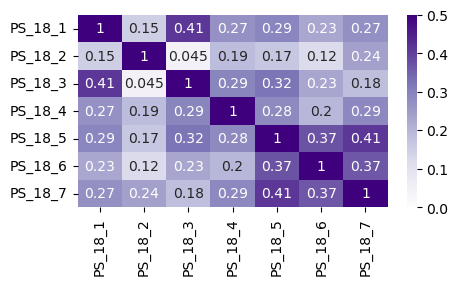

In [57]:
plt.figure(figsize=(5,2.5))
c= PS.corr()
sns.heatmap(c, vmin=0, vmax=0.5, annot=True, cmap="Purples")

In [58]:
PS_1 = sub_data[['PS_18_1', 'PS_18_3', 'PS_18_4', 'PS_18_5', 'PS_18_6', 'PS_18_7']]

<Axes: >

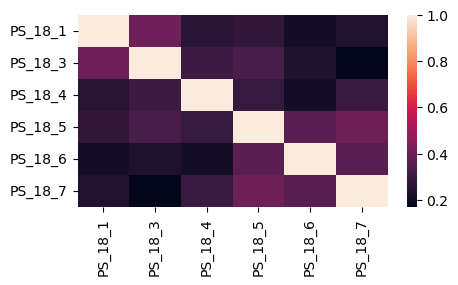

In [59]:
plt.figure(figsize=(5,2.5))
c = PS_1.corr()
sns.heatmap(c)

In [60]:
pg.cronbach_alpha(data=PS_1, nan_policy='listwise')

(0.6929479660885117, array([0.648, 0.734]))

In [61]:
pg.cronbach_alpha(data=PS, nan_policy='listwise')

(0.6893548008085381, array([0.646, 0.729]))

### PS with all variables

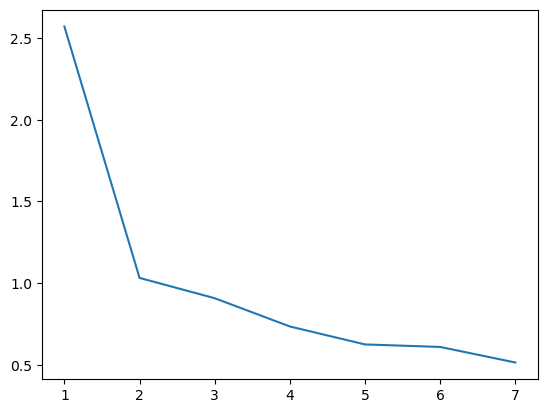

In [62]:
x = PS
fa = FactorAnalyzer()
fa.fit(x, 10)
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]+1),ev)

In [63]:
fa = FactorAnalyzer(1, method='minres', use_smc=True)
fa.fit(PS)

FactorAnalyzer(bounds=(0.00, 1), impute='median', is_corr_matrix=False,
               method='minres', use_smc=True)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1'], index=PS.columns)
print('Factor Loadings \n%s' %loadings)

fa.get_communalities()

Factor Loadings 
         Factor 1
PS_18_1 -0.531734
PS_18_2 -0.280752
PS_18_3 -0.498684
PS_18_4 -0.488080
PS_18_5 -0.642982
PS_18_6 -0.511529
PS_18_7 -0.586383


/Users/emilielouisedebang/anaconda3/lib/python3.10/site-packages/factor_analyzer/factor_analyzer.py:662: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


array([0.28274139, 0.07882159, 0.24868562, 0.23822217, 0.4134254 ,
       0.26166159, 0.34384464])

### PS without PS_18_2 

This is left out based on cronbach alpha level and communalities shown in the factor analysis. 

In [64]:
fa = FactorAnalyzer(1, method='minres', use_smc=True)
fa.fit(PS_1)

FactorAnalyzer(bounds=(0.00, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=4, use_smc=True)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1'], index=PS_1.columns)
print('Factor Loadings \n%s' %loadings)

fa.get_communalities()

Factor Loadings 
         Factor 1
PS_18_1 -0.504002
PS_18_3 -0.526351
PS_18_4 -0.490132
PS_18_5 -0.643490
PS_18_6 -0.510149
PS_18_7 -0.545953


/Users/emilielouisedebang/anaconda3/lib/python3.10/site-packages/factor_analyzer/factor_analyzer.py:662: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


array([0.25401811, 0.27704528, 0.24022982, 0.41408002, 0.26025204,
       0.29806449])

In [65]:
x = PS_1
fa = FactorAnalyzer()
fa.fit(x, 10)

fa.get_eigenvalues()


(array([2.44381534, 0.98093261, 0.76843929, 0.66465962, 0.62348929,
        0.51866386]),
 array([ 1.86245858,  0.56767461,  0.12825768, -0.02412382, -0.09223827,
        -0.1115305 ]))

In [66]:
fa.fit_transform(x) 

array([[ 0.00191263, -0.54608673, -0.49221616],
       [ 1.00469347,  0.95932301,  0.94618559],
       [ 0.0295355 , -0.73064673, -0.35734716],
       ...,
       [ 0.97158265,  0.60484981,  0.93916198],
       [ 0.91909387,  0.88252403,  0.7862091 ],
       [ 0.26807245,  0.88101209,  0.73940529]])

In [67]:
PS_scale = (PS['PS_18_1'] + PS['PS_18_2'] + PS['PS_18_3'] + PS['PS_18_4'] + PS['PS_18_5'] + PS['PS_18_6'] + PS['PS_18_7'])/7*100
print(PS_scale)

0      71.428571
1      96.428571
2      67.857143
3      85.714286
4      67.857143
         ...    
490    85.714286
491    85.714286
492    96.428571
493    92.857143
494    92.857143
Length: 495, dtype: float64


In [68]:
sub_data.loc[:,'PS_scale'] = PS_scale

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_3012/4194551214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:,'PS_scale'] = PS_scale


In [69]:
sub_data

,Location_1,Age_2,Gender_3,Role_4,Experience_5,AgileExp_6,Education_7,AgileMethod_9,TeamSize_10,MultiFunc_12_1,...,Software engineer,Senior software engineer,Tech Lead,QA,Other,Multiple teams,In-house,Outsourced,Mixed,PS_scale
0,United Kingdom,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,7.0,Somewhat disagree,...,0,1,0,0,0,0.0,1,0,0,71.428571
1,Netherlands,30 years or younger,Male,"Software developers (including Front End, Back...",3 - 5 years,Less than 3 years,Bachelor's degree,"Scrum,Kanban",10.0,Somewhat agree,...,0,0,0,0,0,1.0,1,0,0,96.428571
2,United Kingdom,Over 51 years old,Male,Senior software engineer,More than 12 years,6 - 8 years,Master's degree,Scrum,5.0,Somewhat agree,...,0,1,0,0,0,0.0,1,0,0,67.857143
3,Denmark,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Somewhat agree,...,0,1,0,0,0,1.0,1,0,0,85.714286
4,Poland,31 - 40 years,Male,Software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Strongly agree,...,1,0,0,0,0,0.0,0,1,0,67.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,Portugal,30 years or younger,Male,Tech Lead,3 - 5 years,3 - 5 years,Master's degree,Scrum,5.0,Somewhat agree,...,0,0,1,0,0,0.0,1,0,0,85.714286
491,United Kingdom,41 - 50 years,Male,Senior software engineer,More than 12 years,6 - 8 years,PhD,Scrum,6.0,Somewhat agree,...,0,1,0,0,0,0.0,1,0,0,85.714286
492,United Kingdom,31 - 40 years,Male,"Software developers (including Front End, Back...",9 - 11 years,Less than 3 years,Master's degree,Scrum,2.0,Strongly agree,...,0,0,0,0,0,0.0,0,1,0,96.428571
493,United States,30 years or younger,Male,"Software developers (including Front End, Back...",6 - 8 years,3 - 5 years,Bachelor's degree,Scrum,5.0,Strongly agree,...,0,0,0,0,0,0.0,0,0,1,92.857143


## H3 - Autonomy scale

In [70]:
autonomy_list = list(['Autonomy_24_1', 'Autonomy_24_2', 'Autonomy_24_3', 
                      'Autonomy_24_4', 'Autonomy_24_5', 'Autonomy_24_6'])

In [71]:
autonomy = sub_data[autonomy_list]
autonomy.head()

,Autonomy_24_1,Autonomy_24_2,Autonomy_24_3,Autonomy_24_4,Autonomy_24_5,Autonomy_24_6
0,Neither agree nor disagree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Neither agree nor disagree
1,Somewhat agree,Somewhat agree,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,Strongly agree
2,Somewhat agree,Neither agree nor disagree,Strongly agree,Somewhat agree,Strongly agree,Strongly agree
3,Somewhat agree,Somewhat agree,Strongly agree,Somewhat agree,Strongly agree,Strongly agree
4,Somewhat agree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Somewhat agree


In [72]:
autonomy.loc[:,autonomy_list] = autonomy[autonomy_list].replace(not_reversed_replacer)

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_3012/1339554023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  autonomy.loc[:,autonomy_list] = autonomy[autonomy_list].replace(not_reversed_replacer)


In [73]:
autonomy

,Autonomy_24_1,Autonomy_24_2,Autonomy_24_3,Autonomy_24_4,Autonomy_24_5,Autonomy_24_6
0,0.5,0.75,0.75,0.75,0.75,0.5
1,0.75,0.75,0.5,0.75,0.5,1.0
2,0.75,0.5,1.0,0.75,1.0,1.0
3,0.75,0.75,1.0,0.75,1.0,1.0
4,0.75,0.5,0.75,0.75,0.5,0.75
...,...,...,...,...,...,...
490,0.5,0.25,0.75,0.75,0.75,0.75
491,0.75,0.75,0.5,1.0,0.75,0.75
492,1.0,1.0,0.75,1.0,1.0,1.0
493,0.75,0.75,1.0,0.75,0.75,0.75


In [74]:
autonomy = autonomy.astype(float)

In [75]:
autonomy.corr()

,Autonomy_24_1,Autonomy_24_2,Autonomy_24_3,Autonomy_24_4,Autonomy_24_5,Autonomy_24_6
Autonomy_24_1,1.000000,0.649022,0.356351,0.339448,0.384923,0.320972
Autonomy_24_2,0.649022,1.000000,0.357432,0.314399,0.407732,0.281473
Autonomy_24_3,0.356351,0.357432,1.000000,0.294372,0.337652,0.424732
Autonomy_24_4,0.339448,0.314399,0.294372,1.000000,0.341815,0.288734
Autonomy_24_5,0.384923,0.407732,0.337652,0.341815,1.000000,0.426405
Autonomy_24_6,0.320972,0.281473,0.424732,0.288734,0.426405,1.000000


<Axes: >

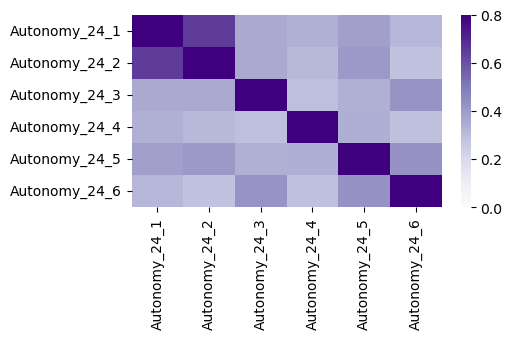

In [76]:
plt.figure(figsize=(5,2.5))
autofig = autonomy.corr()
sns.heatmap(autofig, vmin=0.0, vmax=0.8, cmap='Purples')

In [77]:
pg.cronbach_alpha(data=autonomy, nan_policy='listwise')

(0.7704455904663368, array([0.737, 0.801]))

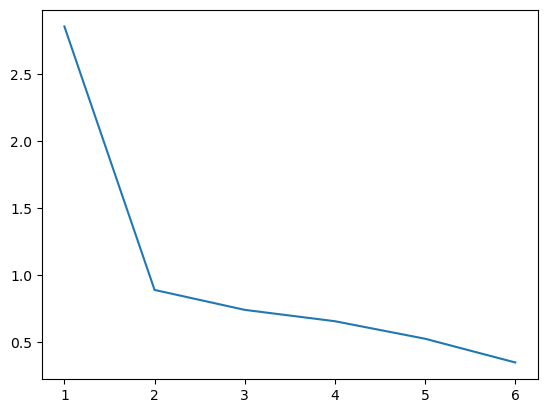

In [78]:
x = autonomy
fa = FactorAnalyzer()
fa.fit(x, 10)
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]+1),ev)

In [79]:
fa = FactorAnalyzer(1, rotation="varimax", method='minres', use_smc=True)
fa.fit(autonomy)

FactorAnalyzer(bounds=(0.00, 1), impute='median', is_corr_matrix=False,
               method='minres', use_smc=True)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1'], index=autonomy.columns)
print('Factor Loadings \n%s' %loadings)

fa.get_communalities()

Factor Loadings 
               Factor 1
Autonomy_24_1 -0.710536
Autonomy_24_2 -0.696681
Autonomy_24_3 -0.566908
Autonomy_24_4 -0.499152
Autonomy_24_5 -0.619138
Autonomy_24_6 -0.551963


/Users/emilielouisedebang/anaconda3/lib/python3.10/site-packages/factor_analyzer/factor_analyzer.py:662: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


array([0.50486097, 0.48536402, 0.3213844 , 0.24915314, 0.38333168,
       0.30466364])

In [80]:
autonomy_scale = ((autonomy['Autonomy_24_1'] + autonomy['Autonomy_24_2'] + autonomy['Autonomy_24_3'] + 
                    autonomy['Autonomy_24_4'] + autonomy['Autonomy_24_5'] + autonomy['Autonomy_24_6'])/6)*100

In [81]:
sub_data.loc[:,'Autonomy_scale'] = autonomy_scale

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_3012/2188396878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:,'Autonomy_scale'] = autonomy_scale


In [82]:
sub_data.head()

,Location_1,Age_2,Gender_3,Role_4,Experience_5,AgileExp_6,Education_7,AgileMethod_9,TeamSize_10,MultiFunc_12_1,...,Senior software engineer,Tech Lead,QA,Other,Multiple teams,In-house,Outsourced,Mixed,PS_scale,Autonomy_scale
0,United Kingdom,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,7.0,Somewhat disagree,...,1,0,0,0,0.0,1,0,0,71.428571,66.666667
1,Netherlands,30 years or younger,Male,"Software developers (including Front End, Back...",3 - 5 years,Less than 3 years,Bachelor's degree,"Scrum,Kanban",10.0,Somewhat agree,...,0,0,0,0,1.0,1,0,0,96.428571,70.833333
2,United Kingdom,Over 51 years old,Male,Senior software engineer,More than 12 years,6 - 8 years,Master's degree,Scrum,5.0,Somewhat agree,...,1,0,0,0,0.0,1,0,0,67.857143,83.333333
3,Denmark,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Somewhat agree,...,1,0,0,0,1.0,1,0,0,85.714286,87.500000
4,Poland,31 - 40 years,Male,Software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Strongly agree,...,0,0,0,0,0.0,0,1,0,67.857143,66.666667


## H5 - Openness in communication scale

In [83]:
openness_list = list(['Openness_29_1', 'Openness_29_2', 'Openness_29_3', 'Openness_29_4', 'Openness_29_5', 
                      'SpeakingUp_30_1', 'SpeakingUp_30_2', 'SpeakingUp_30_3', 'SpeakingUp_30_4'])

In [84]:
openness = sub_data[openness_list]

In [85]:
openness.head()

,Openness_29_1,Openness_29_2,Openness_29_3,Openness_29_4,Openness_29_5,SpeakingUp_30_1,SpeakingUp_30_2,SpeakingUp_30_3,SpeakingUp_30_4
0,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Somewhat agree
1,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
2,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Neither agree nor disagree,​​​​​​​Somewhat disagree,Neither agree nor disagree,​​​​​​​Somewhat disagree,Neither agree nor disagree
3,Somewhat agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Somewhat agree,Strongly agree,Strongly agree
4,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat disagree,Somewhat disagree,Strongly agree,Strongly agree,Strongly agree,Strongly agree


In [86]:
openness.loc[:,openness_list] = openness[openness_list].replace(not_reversed_replacer)

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_3012/2281287477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openness.loc[:,openness_list] = openness[openness_list].replace(not_reversed_replacer)


In [87]:
openness.head()

,Openness_29_1,Openness_29_2,Openness_29_3,Openness_29_4,Openness_29_5,SpeakingUp_30_1,SpeakingUp_30_2,SpeakingUp_30_3,SpeakingUp_30_4
0,0.75,0.75,0.75,0.75,0.75,0.5,0.75,0.75,0.75
1,1.0,1.0,1.0,1.0,1.0,1,1,1,1
2,0.5,0.5,0.75,0.75,0.5,​​​​​​​Somewhat disagree,0.5,​​​​​​​Somewhat disagree,0.5
3,0.75,1.0,1.0,1.0,1.0,0.75,0.75,1,1
4,0.75,0.5,0.5,0.25,0.25,1,1,1,1


In [88]:
openness['SpeakingUp_30_3'].value_counts()

0.75                        212
1                           204
0.5                          30
​​​​​​​Somewhat disagree     17
0                             6
Name: SpeakingUp_30_3, dtype: int64

In [89]:
new_replacer = {'​​​​​​​Somewhat disagree' : 0.25}

In [90]:
openness.loc[:,openness_list] = openness[openness_list].replace(new_replacer)

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_3012/2138956609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  openness.loc[:,openness_list] = openness[openness_list].replace(new_replacer)


In [91]:
openness

,Openness_29_1,Openness_29_2,Openness_29_3,Openness_29_4,Openness_29_5,SpeakingUp_30_1,SpeakingUp_30_2,SpeakingUp_30_3,SpeakingUp_30_4
0,0.75,0.75,0.75,0.75,0.75,0.5,0.75,0.75,0.75
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.5,0.5,0.75,0.75,0.5,0.25,0.5,0.25,0.5
3,0.75,1.0,1.0,1.0,1.0,0.75,0.75,1.0,1.0
4,0.75,0.5,0.5,0.25,0.25,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
490,0.75,0.75,0.75,0.5,0.75,0.75,0.5,0.75,0.75
491,0.75,1.0,1.0,1.0,0.25,0.75,0.75,1.0,1.0
492,1.0,1.0,1.0,1.0,1.0,0.75,1.0,1.0,0.75
493,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [92]:
openness = openness.astype(float)

In [93]:
openness.corr()

,Openness_29_1,Openness_29_2,Openness_29_3,Openness_29_4,Openness_29_5,SpeakingUp_30_1,SpeakingUp_30_2,SpeakingUp_30_3,SpeakingUp_30_4
Openness_29_1,1.000000,0.591843,0.498097,0.455406,0.496043,0.289360,0.300829,0.328140,0.306169
Openness_29_2,0.591843,1.000000,0.501890,0.404458,0.444783,0.430675,0.423116,0.439810,0.456707
Openness_29_3,0.498097,0.501890,1.000000,0.525398,0.470700,0.233200,0.201482,0.218882,0.230115
Openness_29_4,0.455406,0.404458,0.525398,1.000000,0.638731,0.203099,0.227075,0.174348,0.227881
Openness_29_5,0.496043,0.444783,0.470700,0.638731,1.000000,0.244059,0.264464,0.272909,0.225467
SpeakingUp_30_1,0.289360,0.430675,0.233200,0.203099,0.244059,1.000000,0.653740,0.542312,0.521294
SpeakingUp_30_2,0.300829,0.423116,0.201482,0.227075,0.264464,0.653740,1.000000,0.671867,0.585943
SpeakingUp_30_3,0.328140,0.439810,0.218882,0.174348,0.272909,0.542312,0.671867,1.000000,0.650703
SpeakingUp_30_4,0.306169,0.456707,0.230115,0.227881,0.225467,0.521294,0.585943,0.650703,1.000000


<Axes: >

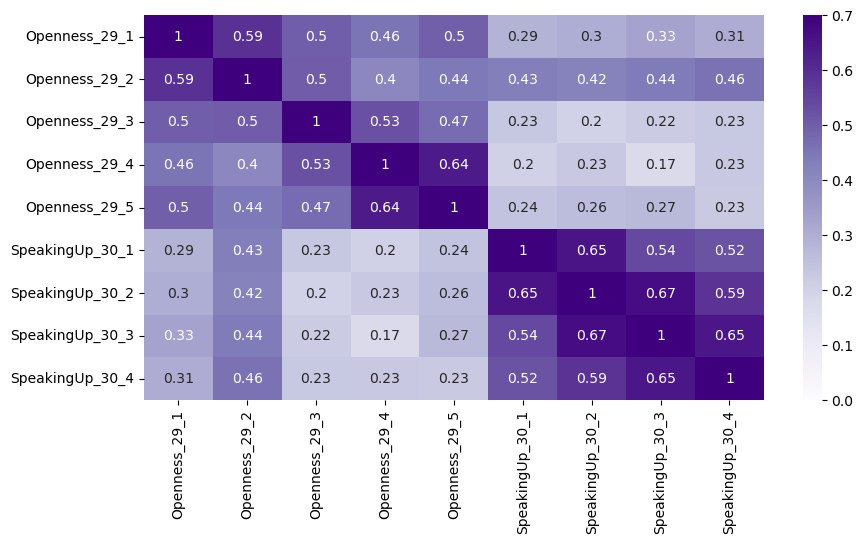

In [94]:
plt.figure(figsize=(10,5))
c = openness.corr()
sns.heatmap(c, vmin=0, vmax=0.7, annot=True, cmap="Purples")

In [95]:
pg.cronbach_alpha(data=openness, nan_policy='listwise')

(0.8561712748960292, array([0.836, 0.875]))

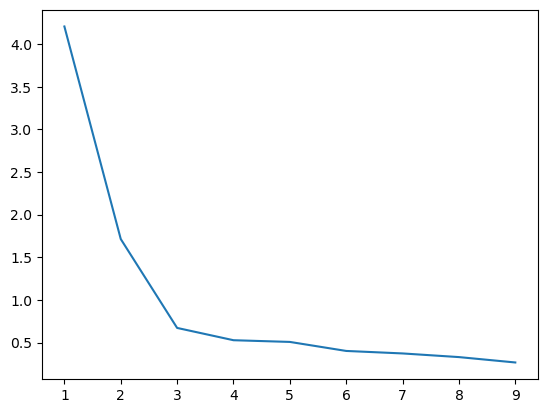

In [96]:
x = openness
fa = FactorAnalyzer()
fa.fit(x, 10)
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]+1),ev)

In [97]:
fa = FactorAnalyzer(1, rotation="varimax", method='minres', use_smc=True)
fa.fit(openness)

FactorAnalyzer(bounds=(0.00, 1), impute='median', is_corr_matrix=False,
               method='minres', use_smc=True)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1'], index=openness.columns)
print('Factor Loadings \n%s' %loadings)

fa.get_communalities()

Factor Loadings 
                 Factor 1
Openness_29_1   -0.639432
Openness_29_2   -0.743430
Openness_29_3   -0.551390
Openness_29_4   -0.540722
Openness_29_5   -0.583411
SpeakingUp_30_1 -0.629194
SpeakingUp_30_2 -0.675210
SpeakingUp_30_3 -0.671055
SpeakingUp_30_4 -0.649045


/Users/emilielouisedebang/anaconda3/lib/python3.10/site-packages/factor_analyzer/factor_analyzer.py:662: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


array([0.40887321, 0.55268774, 0.30403093, 0.29238068, 0.34036875,
       0.39588546, 0.45590834, 0.45031431, 0.42125915])

In [98]:
fa = FactorAnalyzer(2, rotation="varimax", method='minres', use_smc=True)
fa.fit(openness)

FactorAnalyzer(bounds=(0.00, 2), impute='median', is_corr_matrix=False,
               method='minres', use_smc=True)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2'], index=openness.columns)
print('Factor Loadings \n%s' %loadings)

fa.get_communalities()

Factor Loadings 
                 Factor 1  Factor 2
Openness_29_1    0.263542  0.656104
Openness_29_2    0.444257  0.586660
Openness_29_3    0.133944  0.686032
Openness_29_4    0.084913  0.741834
Openness_29_5    0.151174  0.722963
SpeakingUp_30_1  0.696063  0.190867
SpeakingUp_30_2  0.811155  0.164879
SpeakingUp_30_3  0.793598  0.171192
SpeakingUp_30_4  0.722111  0.195666


array([0.4999275 , 0.54153403, 0.48858028, 0.55752795, 0.54552836,
       0.52093356, 0.6851581 , 0.65910445, 0.55972958])

In [99]:
openness_scale = (openness['Openness_29_1'] + openness['Openness_29_2'] + openness['Openness_29_3'] + openness['Openness_29_4'] + openness['Openness_29_5'] + 
                  openness['SpeakingUp_30_1'] + openness['SpeakingUp_30_2'] +  openness['SpeakingUp_30_3'] + openness['SpeakingUp_30_4'])/9*100

In [100]:
openness_scale

0       72.222222
1      100.000000
2       50.000000
3       91.666667
4       69.444444
          ...    
490     69.444444
491     83.333333
492     94.444444
493    100.000000
494     86.111111
Length: 469, dtype: float64

In [101]:
sub_data.loc[:,'Openness_scale'] = openness_scale

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_3012/745284933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:,'Openness_scale'] = openness_scale


## H6 - Leadership scale

In [102]:
leadership_list = list(['Leadership_19_1', 'Leadership_19_2', 'Leadership_19_3', 
                      'Leadership_20_1', 'Leadership_20_2', 'Leadership_20_3', 
                      'Leadership_21_1', 'Leadership_21_2', 'Leadership_21_3', 'Leadership_21_4', 
                      'Leadership_22_1', 'Leadership_22_2', 'Leadership_22_3', 'Leadership_22_4', 'Leadership_22_5'])

In [103]:
leadership = sub_data[leadership_list]

In [104]:
leadership.head()

,Leadership_19_1,Leadership_19_2,Leadership_19_3,Leadership_20_1,Leadership_20_2,Leadership_20_3,Leadership_21_1,Leadership_21_2,Leadership_21_3,Leadership_21_4,Leadership_22_1,Leadership_22_2,Leadership_22_3,Leadership_22_4,Leadership_22_5
0,Neither agree nor disagree,Somewhat disagree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat disagree,Somewhat disagree
1,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Strongly agree,Strongly agree,Somewhat agree,Strongly agree
2,Somewhat disagree,Somewhat agree,Strongly agree,Somewhat agree,Somewhat disagree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat disagree,Somewhat agree
3,Strongly agree,Somewhat agree,Strongly agree,Somewhat agree,Strongly agree,Strongly agree,Somewhat agree,Somewhat agree,Strongly agree,Somewhat agree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Somewhat agree
4,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Strongly agree,Somewhat disagree,Somewhat disagree,Neither agree nor disagree,Somewhat agree,Somewhat disagree,Somewhat agree,Somewhat agree,Neither agree nor disagree,Somewhat agree


In [105]:
leadership.loc[:,leadership_list] = leadership[leadership_list].replace(not_reversed_replacer)

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_3012/3019114048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  leadership.loc[:,leadership_list] = leadership[leadership_list].replace(not_reversed_replacer)


In [106]:
leadership['Leadership_19_1'].value_counts()

0.75    215
0.50    113
1.00     96
0.25     32
0.00     13
Name: Leadership_19_1, dtype: int64

In [107]:
leadership = leadership.astype(float)

In [108]:
leadership.corr()

,Leadership_19_1,Leadership_19_2,Leadership_19_3,Leadership_20_1,Leadership_20_2,Leadership_20_3,Leadership_21_1,Leadership_21_2,Leadership_21_3,Leadership_21_4,Leadership_22_1,Leadership_22_2,Leadership_22_3,Leadership_22_4,Leadership_22_5
Leadership_19_1,1.000000,0.490464,0.439543,0.604588,0.636473,0.481642,0.590428,0.492269,0.407421,0.516088,0.461046,0.615463,0.661989,0.515143,0.471625
Leadership_19_2,0.490464,1.000000,0.571513,0.449682,0.392950,0.418239,0.353457,0.376433,0.313166,0.442827,0.518034,0.382746,0.378590,0.496475,0.395570
Leadership_19_3,0.439543,0.571513,1.000000,0.529913,0.554387,0.572642,0.487611,0.476276,0.466278,0.541882,0.481991,0.436174,0.414016,0.481264,0.523231
Leadership_20_1,0.604588,0.449682,0.529913,1.000000,0.751676,0.710767,0.728692,0.623289,0.512944,0.659808,0.599977,0.658404,0.631858,0.647279,0.620641
Leadership_20_2,0.636473,0.392950,0.554387,0.751676,1.000000,0.707837,0.681899,0.614994,0.549904,0.657370,0.565167,0.618037,0.597184,0.604533,0.576059
Leadership_20_3,0.481642,0.418239,0.572642,0.710767,0.707837,1.000000,0.599135,0.516820,0.533941,0.618356,0.561698,0.537875,0.495429,0.525279,0.574295
Leadership_21_1,0.590428,0.353457,0.487611,0.728692,0.681899,0.599135,1.000000,0.690865,0.608720,0.760495,0.579385,0.631727,0.644254,0.613954,0.636682
Leadership_21_2,0.492269,0.376433,0.476276,0.623289,0.614994,0.516820,0.690865,1.000000,0.579233,0.660870,0.478683,0.553713,0.534746,0.588104,0.584490
Leadership_21_3,0.407421,0.313166,0.466278,0.512944,0.549904,0.533941,0.608720,0.579233,1.000000,0.689190,0.414760,0.473530,0.491797,0.451598,0.535852
Leadership_21_4,0.516088,0.442827,0.541882,0.659808,0.657370,0.618356,0.760495,0.660870,0.689190,1.000000,0.561430,0.587135,0.584359,0.569523,0.621977


<Axes: >

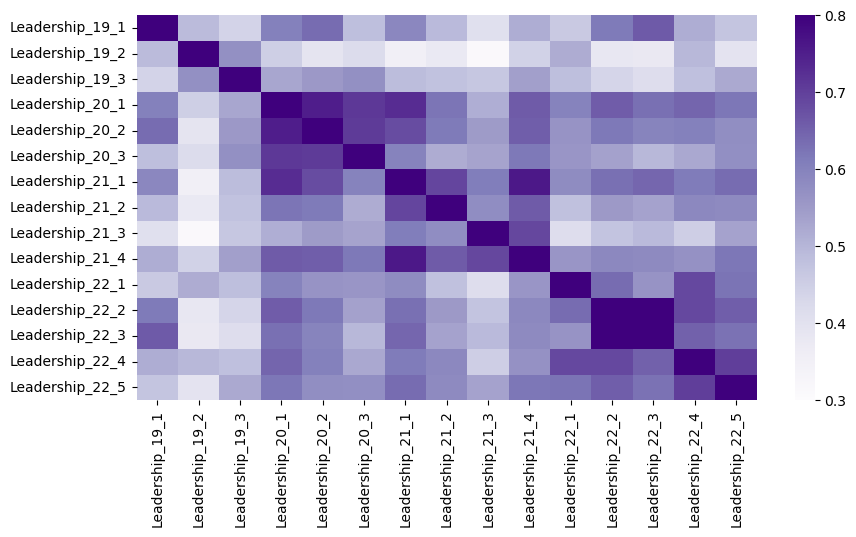

In [109]:
plt.figure(figsize=(10,5))
c = leadership.corr()
sns.heatmap(c, vmin=0.3, vmax=0.8, cmap='Purples')

In [110]:
pg.cronbach_alpha(data=leadership, nan_policy='listwise')

(0.9499098824171428, array([0.943, 0.956]))

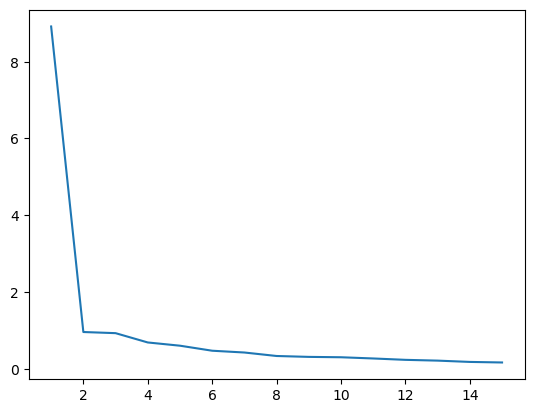

In [111]:
x = leadership
fa = FactorAnalyzer()
fa.fit(x, 10)
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]+1),ev)

In [112]:
fa = FactorAnalyzer(1, rotation="varimax", method='minres', use_smc=True)
fa.fit(leadership)

FactorAnalyzer(bounds=(0.00, 1), impute='median', is_corr_matrix=False,
               method='minres', use_smc=True)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1'], index=leadership.columns)
print('Factor Loadings \n%s' %loadings)

fa.get_communalities()

Factor Loadings 
                 Factor 1
Leadership_19_1  0.699933
Leadership_19_2  0.554816
Leadership_19_3  0.652358
Leadership_20_1  0.841123
Leadership_20_2  0.817383
Leadership_20_3  0.748241
Leadership_21_1  0.830438
Leadership_21_2  0.741747
Leadership_21_3  0.666832
Leadership_21_4  0.810995
Leadership_22_1  0.734852
Leadership_22_2  0.796618
Leadership_22_3  0.776131
Leadership_22_4  0.786024
Leadership_22_5  0.779842


/Users/emilielouisedebang/anaconda3/lib/python3.10/site-packages/factor_analyzer/factor_analyzer.py:662: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


array([0.4899063 , 0.30782104, 0.42557124, 0.70748709, 0.6681156 ,
       0.55986494, 0.68962697, 0.55018795, 0.44466502, 0.65771333,
       0.5400077 , 0.63460007, 0.60237977, 0.61783326, 0.60815284])

In [113]:
leadership_1 = leadership[['Leadership_19_1', 'Leadership_19_3', 
                          'Leadership_20_1', 'Leadership_20_2', 'Leadership_20_3', 
                          'Leadership_21_1', 'Leadership_21_2', 'Leadership_21_3', 'Leadership_21_4', 
                          'Leadership_22_1', 'Leadership_22_2', 'Leadership_22_3', 'Leadership_22_4', 'Leadership_22_5']] 

In [114]:
leadership_1

,Leadership_19_1,Leadership_19_3,Leadership_20_1,Leadership_20_2,Leadership_20_3,Leadership_21_1,Leadership_21_2,Leadership_21_3,Leadership_21_4,Leadership_22_1,Leadership_22_2,Leadership_22_3,Leadership_22_4,Leadership_22_5
0,0.50,0.50,0.75,0.75,0.75,0.75,0.50,0.75,0.75,0.75,0.50,0.50,0.25,0.25
1,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.75,1.00,1.00,0.75,1.00
2,0.25,1.00,0.75,0.25,0.75,0.75,0.50,0.50,0.75,0.75,0.50,0.50,0.25,0.75
3,1.00,1.00,0.75,1.00,1.00,0.75,0.75,1.00,0.75,0.50,0.75,0.75,0.50,0.75
4,0.75,0.50,0.75,0.75,1.00,0.25,0.25,0.50,0.75,0.25,0.75,0.75,0.50,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,0.75,1.00,0.75,0.50,0.50,0.75,0.75,0.75,0.75,0.50,0.75,0.75,0.75,0.75
491,0.50,0.75,0.75,0.50,0.75,0.75,0.75,1.00,0.75,0.25,0.50,0.50,0.25,0.25
492,0.50,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
493,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [115]:
fa = FactorAnalyzer(1, rotation="varimax", method='minres', use_smc=True)
fa.fit(leadership_1)

FactorAnalyzer(bounds=(0.00, 1), impute='median', is_corr_matrix=False,
               method='minres', use_smc=True)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1'], index=leadership_1.columns)
print('Factor Loadings \n%s' %loadings)

fa.get_communalities()

Factor Loadings 
                 Factor 1
Leadership_19_1  0.692208
Leadership_19_3  0.636396
Leadership_20_1  0.842450
Leadership_20_2  0.822058
Leadership_20_3  0.747737
Leadership_21_1  0.839313
Leadership_21_2  0.744622
Leadership_21_3  0.671249
Leadership_21_4  0.811718
Leadership_22_1  0.726049
Leadership_22_2  0.801279
Leadership_22_3  0.780282
Leadership_22_4  0.781051
Leadership_22_5  0.782579


/Users/emilielouisedebang/anaconda3/lib/python3.10/site-packages/factor_analyzer/factor_analyzer.py:662: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


array([0.47915204, 0.40500037, 0.70972145, 0.67577957, 0.55911093,
       0.70444591, 0.55446192, 0.45057459, 0.65888669, 0.52714651,
       0.64204858, 0.60884052, 0.61004053, 0.61243062])

In [116]:
pg.cronbach_alpha(data=leadership_1, nan_policy='listwise')

(0.9508294590658875, array([0.944, 0.957]))

Det er minimalt hvad fjernelsen af variable 'leadership_19_2' kan hjælpe med, derfor vælger vi at beholde den for autensiteten af vores data. 

In [117]:
Leadership_scale = (leadership['Leadership_19_1'] + leadership['Leadership_19_2'] + leadership['Leadership_19_3'] + 
                    leadership['Leadership_20_1'] + leadership['Leadership_20_2'] + leadership['Leadership_20_3'] + 
                    leadership['Leadership_21_1'] + leadership['Leadership_21_2'] + leadership['Leadership_21_3'] + leadership['Leadership_21_4'] + 
                    leadership['Leadership_22_1'] + leadership['Leadership_22_2'] + leadership['Leadership_22_3'] + leadership['Leadership_22_4'] + leadership['Leadership_22_5'])/15*100

In [118]:
sub_data.loc[:,'Leadership_scale'] = Leadership_scale

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_3012/1056599036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:,'Leadership_scale'] = Leadership_scale


In [119]:
sub_data.head()

,Location_1,Age_2,Gender_3,Role_4,Experience_5,AgileExp_6,Education_7,AgileMethod_9,TeamSize_10,MultiFunc_12_1,...,QA,Other,Multiple teams,In-house,Outsourced,Mixed,PS_scale,Autonomy_scale,Openness_scale,Leadership_scale
0,United Kingdom,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,7.0,Somewhat disagree,...,0,0,0.0,1,0,0,71.428571,66.666667,72.222222,56.666667
1,Netherlands,30 years or younger,Male,"Software developers (including Front End, Back...",3 - 5 years,Less than 3 years,Bachelor's degree,"Scrum,Kanban",10.0,Somewhat agree,...,0,0,1.0,1,0,0,96.428571,70.833333,100.000000,96.666667
2,United Kingdom,Over 51 years old,Male,Senior software engineer,More than 12 years,6 - 8 years,Master's degree,Scrum,5.0,Somewhat agree,...,0,0,0.0,1,0,0,67.857143,83.333333,50.000000,60.000000
3,Denmark,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Somewhat agree,...,0,0,1.0,1,0,0,85.714286,87.500000,91.666667,80.000000
4,Poland,31 - 40 years,Male,Software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Strongly agree,...,0,0,0.0,0,1,0,67.857143,66.666667,69.444444,60.000000


## H8 - Clear decision process scale

In [120]:
ClearDecisions_list = list(['Autonomy_24_1', 'Autonomy_24_2', 'Autonomy_24_3', 'Autonomy_24_4', 'Autonomy_24_5', 'Autonomy_24_6',
                       'DecisionMaking_25_1', 'DecisionMaking_25_2', 'DecisionMaking_25_3', 'DecisionMaking_25_4' ])

In [121]:
ClearDecisions = sub_data[ClearDecisions_list]

In [122]:
ClearDecisions = ClearDecisions.replace(not_reversed_replacer).astype(float)

In [123]:
ClearDecisions.corr()

,Autonomy_24_1,Autonomy_24_2,Autonomy_24_3,Autonomy_24_4,Autonomy_24_5,Autonomy_24_6,DecisionMaking_25_1,DecisionMaking_25_2,DecisionMaking_25_3,DecisionMaking_25_4
Autonomy_24_1,1.000000,0.649022,0.356351,0.339448,0.384923,0.320972,0.284602,0.243996,0.276764,0.268788
Autonomy_24_2,0.649022,1.000000,0.357432,0.314399,0.407732,0.281473,0.330541,0.288840,0.268323,0.271389
Autonomy_24_3,0.356351,0.357432,1.000000,0.294372,0.337652,0.424732,0.236221,0.227582,0.238674,0.263424
Autonomy_24_4,0.339448,0.314399,0.294372,1.000000,0.341815,0.288734,0.321661,0.173773,0.172983,0.181494
Autonomy_24_5,0.384923,0.407732,0.337652,0.341815,1.000000,0.426405,0.373921,0.319491,0.303370,0.306629
Autonomy_24_6,0.320972,0.281473,0.424732,0.288734,0.426405,1.000000,0.271833,0.201867,0.219024,0.183329
DecisionMaking_25_1,0.284602,0.330541,0.236221,0.321661,0.373921,0.271833,1.000000,0.546209,0.469455,0.457339
DecisionMaking_25_2,0.243996,0.288840,0.227582,0.173773,0.319491,0.201867,0.546209,1.000000,0.627512,0.593287
DecisionMaking_25_3,0.276764,0.268323,0.238674,0.172983,0.303370,0.219024,0.469455,0.627512,1.000000,0.526135
DecisionMaking_25_4,0.268788,0.271389,0.263424,0.181494,0.306629,0.183329,0.457339,0.593287,0.526135,1.000000


<Axes: >

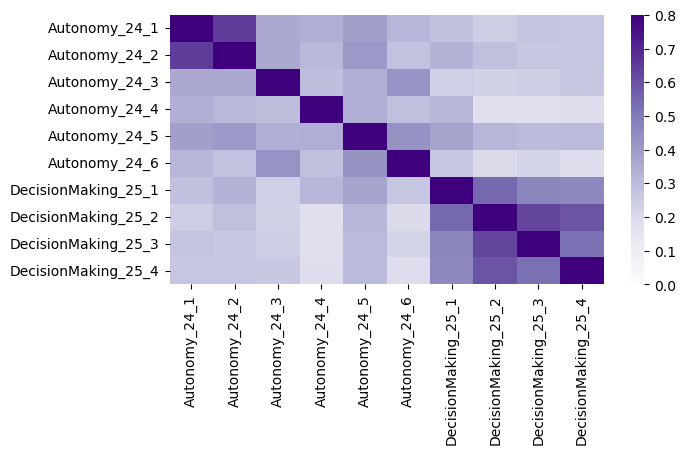

In [124]:
plt.figure(figsize=(7,3.5))
c = ClearDecisions.corr()
sns.heatmap(c, vmin=0, vmax=0.8, cmap='Purples')

In [125]:
pg.cronbach_alpha(data=ClearDecisions, nan_policy='listwise')

(0.8263507425216954, array([0.802, 0.849]))

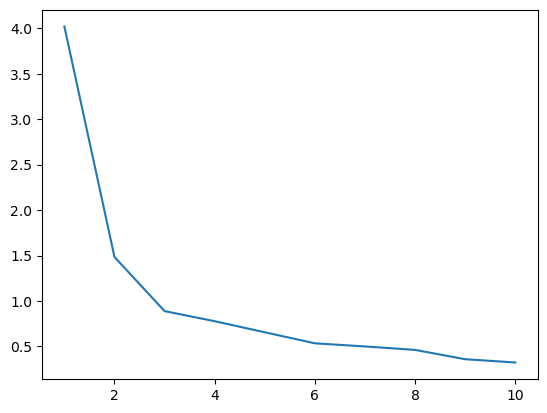

In [126]:
x = ClearDecisions
fa = FactorAnalyzer()
fa.fit(x, 10)
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]+1),ev)

In [127]:
fa = FactorAnalyzer(2, rotation="varimax", method='minres', use_smc=True)
fa.fit(ClearDecisions)

FactorAnalyzer(bounds=(0.00, 1), impute='median', is_corr_matrix=False,
               method='minres', use_smc=True)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2'], index=ClearDecisions.columns)
print('Factor Loadings \n%s' %loadings)

fa.get_communalities()

Factor Loadings 
                     Factor 1  Factor 2
Autonomy_24_1        0.693024  0.162209
Autonomy_24_2        0.670374  0.196917
Autonomy_24_3        0.532584  0.178079
Autonomy_24_4        0.486227  0.142499
Autonomy_24_5        0.565148  0.283767
Autonomy_24_6        0.524732  0.153346
DecisionMaking_25_1  0.330241  0.582410
DecisionMaking_25_2  0.151142  0.842416
DecisionMaking_25_3  0.200040  0.707503
DecisionMaking_25_4  0.210171  0.672056


array([0.50659399, 0.48817812, 0.31535787, 0.25672279, 0.39991629,
       0.2988589 , 0.44826079, 0.73250868, 0.54057623, 0.49583095])

In [128]:
fa = FactorAnalyzer(1, rotation="varimax", method='minres', use_smc=True)
fa.fit(ClearDecisions)

FactorAnalyzer(bounds=(0.00, 1), impute='median', is_corr_matrix=False,
               method='minres', use_smc=True)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1'], index=ClearDecisions.columns)
print('Factor Loadings \n%s' %loadings)

fa.get_communalities()

Factor Loadings 
                     Factor 1
Autonomy_24_1       -0.594047
Autonomy_24_2       -0.607360
Autonomy_24_3       -0.507187
Autonomy_24_4       -0.450436
Autonomy_24_5       -0.609789
Autonomy_24_6       -0.484405
DecisionMaking_25_1 -0.648129
DecisionMaking_25_2 -0.645226
DecisionMaking_25_3 -0.616827
DecisionMaking_25_4 -0.605404


/Users/emilielouisedebang/anaconda3/lib/python3.10/site-packages/factor_analyzer/factor_analyzer.py:662: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


array([0.35289207, 0.36888659, 0.25723916, 0.20289269, 0.37184268,
       0.23464784, 0.42007143, 0.41631704, 0.38047576, 0.36651371])

In [129]:
ClearDecisions_scale = (ClearDecisions['Autonomy_24_1'] + ClearDecisions['Autonomy_24_2'] + ClearDecisions['Autonomy_24_3'] + ClearDecisions['Autonomy_24_4'] + ClearDecisions['Autonomy_24_5'] + ClearDecisions['Autonomy_24_6'] +
                        ClearDecisions['DecisionMaking_25_1'] + ClearDecisions['DecisionMaking_25_2'] + ClearDecisions['DecisionMaking_25_3'] + ClearDecisions['DecisionMaking_25_4'])/10*100

In [130]:
ClearDecisions_scale.value_counts()

90.0     44
77.5     37
75.0     35
82.5     33
65.0     32
80.0     30
87.5     30
72.5     30
67.5     29
70.0     29
85.0     24
95.0     20
92.5     19
62.5     16
97.5     11
100.0     9
55.0      7
52.5      7
57.5      6
60.0      6
47.5      4
50.0      2
35.0      2
42.5      2
45.0      1
17.5      1
32.5      1
22.5      1
2.5       1
dtype: int64

In [131]:
sub_data.loc[:,'ClearDecisions_scale'] = ClearDecisions_scale

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_3012/1219179718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:,'ClearDecisions_scale'] = ClearDecisions_scale


In [132]:
sub_data.head()

,Location_1,Age_2,Gender_3,Role_4,Experience_5,AgileExp_6,Education_7,AgileMethod_9,TeamSize_10,MultiFunc_12_1,...,Other,Multiple teams,In-house,Outsourced,Mixed,PS_scale,Autonomy_scale,Openness_scale,Leadership_scale,ClearDecisions_scale
0,United Kingdom,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,7.0,Somewhat disagree,...,0,0.0,1,0,0,71.428571,66.666667,72.222222,56.666667,67.5
1,Netherlands,30 years or younger,Male,"Software developers (including Front End, Back...",3 - 5 years,Less than 3 years,Bachelor's degree,"Scrum,Kanban",10.0,Somewhat agree,...,0,1.0,1,0,0,96.428571,70.833333,100.000000,96.666667,82.5
2,United Kingdom,Over 51 years old,Male,Senior software engineer,More than 12 years,6 - 8 years,Master's degree,Scrum,5.0,Somewhat agree,...,0,0.0,1,0,0,67.857143,83.333333,50.000000,60.000000,80.0
3,Denmark,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Somewhat agree,...,0,1.0,1,0,0,85.714286,87.500000,91.666667,80.000000,90.0
4,Poland,31 - 40 years,Male,Software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Strongly agree,...,0,0.0,0,1,0,67.857143,66.666667,69.444444,60.000000,57.5


## H9 - Clear feedback scale

In [133]:
ClearFeedback_list = list(['NoBlame_28_1', 'NoBlame_28_2', 'NoBlame_28_3', 
                     'LearningMistakes_33_1', 'LearningMistakes_33_2', 'LearningMistakes_33_3'])

In [134]:
ClearFeedback = sub_data[ClearFeedback_list]

In [135]:
ClearFeedback = ClearFeedback.replace(not_reversed_replacer)

In [136]:
ClearFeedback = ClearFeedback.astype(float)

In [137]:
ClearFeedback.corr()

,NoBlame_28_1,NoBlame_28_2,NoBlame_28_3,LearningMistakes_33_1,LearningMistakes_33_2,LearningMistakes_33_3
NoBlame_28_1,1.000000,0.852547,0.541802,0.429543,0.215875,0.332484
NoBlame_28_2,0.852547,1.000000,0.544890,0.456953,0.268792,0.330366
NoBlame_28_3,0.541802,0.544890,1.000000,0.439447,0.230644,0.318613
LearningMistakes_33_1,0.429543,0.456953,0.439447,1.000000,0.447014,0.597156
LearningMistakes_33_2,0.215875,0.268792,0.230644,0.447014,1.000000,0.611911
LearningMistakes_33_3,0.332484,0.330366,0.318613,0.597156,0.611911,1.000000


<Axes: >

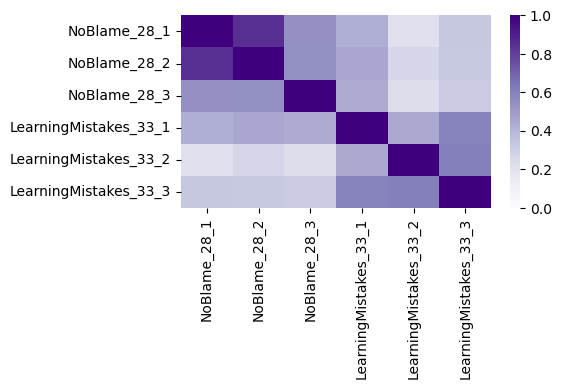

In [138]:
plt.figure(figsize=(5,2.5))
c = ClearFeedback.corr()
sns.heatmap(c, vmin=0, vmax=1, cmap='Purples')

In [139]:
pg.cronbach_alpha(data=ClearFeedback, nan_policy='listwise')

(0.8200393761802806, array([0.794, 0.844]))

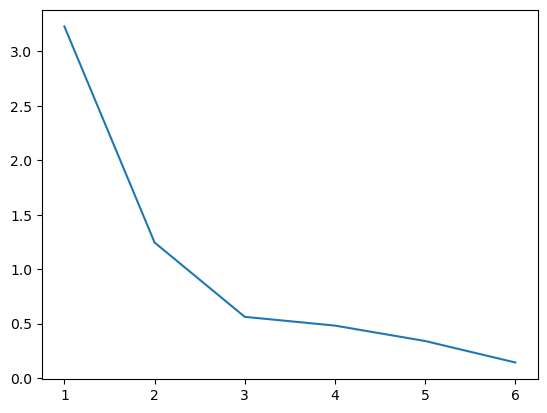

In [140]:
x = ClearFeedback
fa = FactorAnalyzer()
fa.fit(x, 10)
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]+1),ev)

In [141]:
fa = FactorAnalyzer(2, rotation="varimax", method='minres', use_smc=True)
fa.fit(ClearFeedback)

FactorAnalyzer(bounds=(0.00, 1), impute='median', is_corr_matrix=False,
               method='minres', use_smc=True)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2'], index=ClearFeedback.columns)
print('Factor Loadings \n%s' %loadings)

fa.get_communalities()

Factor Loadings 
                       Factor 1  Factor 2
NoBlame_28_1           0.900851  0.168388
NoBlame_28_2           0.897524  0.200473
NoBlame_28_3           0.558080  0.272764
LearningMistakes_33_1  0.386220  0.610971
LearningMistakes_33_2  0.124123  0.668046
LearningMistakes_33_3  0.183205  0.868231


array([0.83988704, 0.84573786, 0.38585329, 0.52245161, 0.46169146,
       0.78738912])

In [142]:
fa = FactorAnalyzer(1, rotation="varimax", method='minres', use_smc=True)
fa.fit(ClearFeedback)

FactorAnalyzer(bounds=(0.00, 1), impute='median', is_corr_matrix=False,
               method='minres', use_smc=True)

loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1'], index=ClearFeedback.columns)
print('Factor Loadings \n%s' %loadings)

fa.get_communalities()

Factor Loadings 
                       Factor 1
NoBlame_28_1          -0.764145
NoBlame_28_2          -0.790243
NoBlame_28_3          -0.631320
LearningMistakes_33_1 -0.698052
LearningMistakes_33_2 -0.489929
LearningMistakes_33_3 -0.613862


/Users/emilielouisedebang/anaconda3/lib/python3.10/site-packages/factor_analyzer/factor_analyzer.py:662: UserWarning: No rotation will be performed when the number of factors equals 1.
  warnings.warn(


array([0.58391784, 0.62448425, 0.39856528, 0.48727692, 0.24003055,
       0.37682598])

In [143]:
ClearFeedback_2 = ClearFeedback[['NoBlame_28_1', 'NoBlame_28_2', 'NoBlame_28_3', 
                     'LearningMistakes_33_1', 'LearningMistakes_33_3']]

In [144]:
pg.cronbach_alpha(data=ClearFeedback_2, nan_policy='listwise')

(0.8215694267457735, array([0.795, 0.846]))

<Axes: >

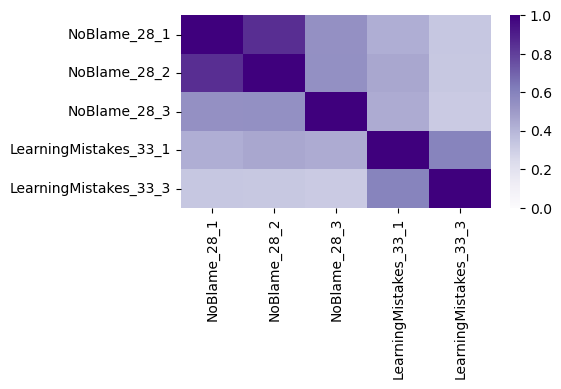

In [145]:
plt.figure(figsize=(5,2.5))
c = ClearFeedback_2.corr()
sns.heatmap(c, vmin=0, vmax=1, cmap='Purples')

In [146]:
ClearFeedback_scale = (ClearFeedback['NoBlame_28_1'] + ClearFeedback['NoBlame_28_2'] + ClearFeedback['NoBlame_28_3'] + 
                       ClearFeedback['LearningMistakes_33_1'] + ClearFeedback['LearningMistakes_33_2'] + ClearFeedback['LearningMistakes_33_3'])/6*100

In [147]:
sub_data.loc[:,'ClearFeedback_scale'] = ClearFeedback_scale

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_3012/863874618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:,'ClearFeedback_scale'] = ClearFeedback_scale


In [148]:
sub_data.head()

,Location_1,Age_2,Gender_3,Role_4,Experience_5,AgileExp_6,Education_7,AgileMethod_9,TeamSize_10,MultiFunc_12_1,...,Multiple teams,In-house,Outsourced,Mixed,PS_scale,Autonomy_scale,Openness_scale,Leadership_scale,ClearDecisions_scale,ClearFeedback_scale
0,United Kingdom,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,7.0,Somewhat disagree,...,0.0,1,0,0,71.428571,66.666667,72.222222,56.666667,67.5,75.000000
1,Netherlands,30 years or younger,Male,"Software developers (including Front End, Back...",3 - 5 years,Less than 3 years,Bachelor's degree,"Scrum,Kanban",10.0,Somewhat agree,...,1.0,1,0,0,96.428571,70.833333,100.000000,96.666667,82.5,75.000000
2,United Kingdom,Over 51 years old,Male,Senior software engineer,More than 12 years,6 - 8 years,Master's degree,Scrum,5.0,Somewhat agree,...,0.0,1,0,0,67.857143,83.333333,50.000000,60.000000,80.0,50.000000
3,Denmark,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Somewhat agree,...,1.0,1,0,0,85.714286,87.500000,91.666667,80.000000,90.0,83.333333
4,Poland,31 - 40 years,Male,Software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Strongly agree,...,0.0,0,1,0,67.857143,66.666667,69.444444,60.000000,57.5,75.000000


# 6. Creating dummie variables for X values

## Colocated

In [149]:
sub_data['Colocated_16'].value_counts()

Less than 1 day per week    194
1-2 days per week           127
3-4 days per week            78
Always                       70
Name: Colocated_16, dtype: int64

In [150]:
Colocated = pd.get_dummies(sub_data['Colocated_16'])

In [151]:
sub_data.loc[:,('Less than 1 day per week', '1-2 days per week', '3-4 days per week', 'Always')] = Colocated[['Less than 1 day per week', '1-2 days per week', '3-4 days per week', 'Always']]

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_3012/4031959518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:,('Less than 1 day per week', '1-2 days per week', '3-4 days per week', 'Always')] = Colocated[['Less than 1 day per week', '1-2 days per week', '3-4 days per week', 'Always']]
/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_3012/4031959518.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:,('Less than 1 day per week', '1-2 days per week', '3-4 days per week'

## Enduring teams

In [152]:
sub_data['WorkingTogether_14'].value_counts()

1 – 2 years          195
Less than 1 year     108
More than 4 years     89
3 – 4 years           77
Name: WorkingTogether_14, dtype: int64

In [153]:
EnduringTeams = pd.get_dummies(sub_data['WorkingTogether_14'])

In [154]:
EnduringTeams

,1 – 2 years,3 – 4 years,Less than 1 year,More than 4 years
0,0,0,1,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
490,1,0,0,0
491,1,0,0,0
492,0,0,0,1
493,1,0,0,0


In [155]:
sub_data.loc[:, ('Less than 1 year', '1 – 2 years', '3 – 4 years', 'More than 4 years')] = EnduringTeams[['Less than 1 year', '1 – 2 years', '3 – 4 years', 'More than 4 years']]

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_3012/815619115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.loc[:, ('Less than 1 year', '1 – 2 years', '3 – 4 years', 'More than 4 years')] = EnduringTeams[['Less than 1 year', '1 – 2 years', '3 – 4 years', 'More than 4 years']]
/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_3012/815619115.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sub_data.loc[:, ('Less than 1 year', '1 – 2 years', '3 – 4 years', 'More than 4 years')] = Enduring

In [156]:
sub_data

,Location_1,Age_2,Gender_3,Role_4,Experience_5,AgileExp_6,Education_7,AgileMethod_9,TeamSize_10,MultiFunc_12_1,...,ClearDecisions_scale,ClearFeedback_scale,Less than 1 day per week,1-2 days per week,3-4 days per week,Always,Less than 1 year,1 – 2 years,3 – 4 years,More than 4 years
0,United Kingdom,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,7.0,Somewhat disagree,...,67.5,75.000000,1,0,0,0,1,0,0,0
1,Netherlands,30 years or younger,Male,"Software developers (including Front End, Back...",3 - 5 years,Less than 3 years,Bachelor's degree,"Scrum,Kanban",10.0,Somewhat agree,...,82.5,75.000000,0,1,0,0,0,1,0,0
2,United Kingdom,Over 51 years old,Male,Senior software engineer,More than 12 years,6 - 8 years,Master's degree,Scrum,5.0,Somewhat agree,...,80.0,50.000000,0,0,1,0,0,1,0,0
3,Denmark,30 years or younger,Female,Senior software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Somewhat agree,...,90.0,83.333333,0,0,1,0,0,1,0,0
4,Poland,31 - 40 years,Male,Software engineer,3 - 5 years,3 - 5 years,Bachelor's degree,Scrum,6.0,Strongly agree,...,57.5,75.000000,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,Portugal,30 years or younger,Male,Tech Lead,3 - 5 years,3 - 5 years,Master's degree,Scrum,5.0,Somewhat agree,...,67.5,54.166667,1,0,0,0,0,1,0,0
491,United Kingdom,41 - 50 years,Male,Senior software engineer,More than 12 years,6 - 8 years,PhD,Scrum,6.0,Somewhat agree,...,72.5,66.666667,1,0,0,0,0,1,0,0
492,United Kingdom,31 - 40 years,Male,"Software developers (including Front End, Back...",9 - 11 years,Less than 3 years,Master's degree,Scrum,2.0,Strongly agree,...,95.0,100.000000,1,0,0,0,0,0,0,1
493,United States,30 years or younger,Male,"Software developers (including Front End, Back...",6 - 8 years,3 - 5 years,Bachelor's degree,Scrum,5.0,Strongly agree,...,87.5,100.000000,0,0,1,0,0,1,0,0


# 7. Hypothesis - Linear regression

## Hypothesis 1 - Colocated

### Baseline model

In [157]:
linear_regressor = LinearRegression()  # create object for the class
X = sub_data[['1-2 days per week', '3-4 days per week', 'Always']]  # values converts it into a numpy array
Y = sub_data['PS_scale']
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,79.7312,0.9620,82.8785,0.0000,0.0109,0.0045,77.8408,81.6217
1,1-2 days per week,-0.8223,1.5295,-0.5377,0.5911,0.0109,0.0045,-3.8278,2.1832
2,3-4 days per week,-4.0444,1.7965,-2.2513,0.0248,0.0109,0.0045,-7.5746,-0.5142
3,Always,-1.1598,1.8683,-0.6208,0.5350,0.0109,0.0045,-4.8311,2.5115


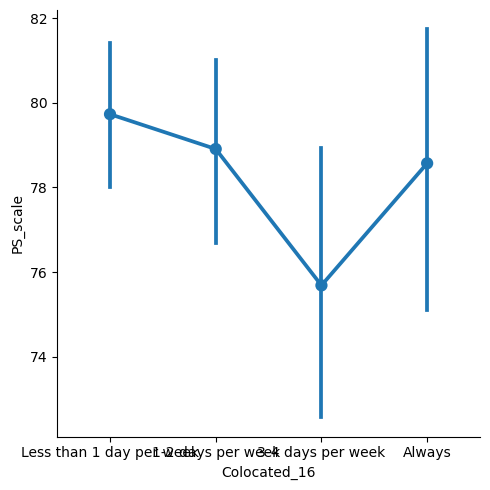

In [158]:
sns.catplot(data=sub_data, x="Colocated_16", y="PS_scale", kind="point")

### Model 1

In [159]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['1-2 days per week', '3-4 days per week', 'Always', 'Gender', 'TeamSize_10']]
Y = sub_data['PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,79.5584,1.2790,62.2046,0.0000,0.011,0.0003,77.0451,82.0717
1,1-2 days per week,-0.8455,1.5369,-0.5501,0.5825,0.011,0.0003,-3.8656,2.1746
2,3-4 days per week,-4.0739,1.8138,-2.2461,0.0252,0.011,0.0003,-7.6382,-0.5096
3,Always,-1.1602,1.8743,-0.6190,0.5362,0.011,0.0003,-4.8434,2.5230
4,Gender,0.2517,1.5871,0.1586,0.8741,0.011,0.0003,-2.8670,3.3704
5,TeamSize_10,0.0167,0.0996,0.1681,0.8666,0.011,0.0003,-0.1790,0.2124


### Model 2

In [160]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['1-2 days per week', '3-4 days per week', 'Always', 'Gender', 'TeamSize_10', 'Outsourced', 'Mixed']]
Y = sub_data['PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,80.8332,1.3245,61.0308,0.0000,0.034,0.0193,78.2305,83.4359
1,1-2 days per week,-1.0950,1.5252,-0.7179,0.4732,0.034,0.0193,-4.0922,1.9022
2,3-4 days per week,-4.1709,1.7984,-2.3192,0.0208,0.034,0.0193,-7.7049,-0.6368
3,Always,-0.7990,1.8596,-0.4297,0.6676,0.034,0.0193,-4.4534,2.8554
4,Gender,0.0868,1.5728,0.0552,0.9560,0.034,0.0193,-3.0040,3.1777
5,TeamSize_10,0.0557,0.0993,0.5603,0.5755,0.034,0.0193,-0.1396,0.2509
6,Outsourced,-4.2315,1.4274,-2.9644,0.0032,0.034,0.0193,-7.0366,-1.4264
7,Mixed,-4.4879,2.2191,-2.0224,0.0437,0.034,0.0193,-8.8487,-0.1271


### Model 3

In [161]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['1-2 days per week', '3-4 days per week', 'Always', 'Gender', 'TeamSize_10', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,75.6194,1.9026,39.7451,0.0000,0.0786,0.0565,71.8805,79.3584
1,1-2 days per week,-1.0185,1.5050,-0.6767,0.4989,0.0786,0.0565,-3.9760,1.9391
2,3-4 days per week,-3.9386,1.7867,-2.2044,0.0280,0.0786,0.0565,-7.4498,-0.4274
3,Always,0.0666,1.8423,0.0361,0.9712,0.0786,0.0565,-3.5539,3.6870
4,Gender,0.5305,1.5566,0.3408,0.7334,0.0786,0.0565,-2.5286,3.5895
5,TeamSize_10,0.0339,0.0981,0.3450,0.7302,0.0786,0.0565,-0.1590,0.2267
6,Outsourced,-3.4321,1.4146,-2.4261,0.0156,0.0786,0.0565,-6.2120,-0.6521
7,Mixed,-4.3361,2.1855,-1.9840,0.0478,0.0786,0.0565,-8.6309,-0.0412
8,3 - 5 years,3.4087,1.8213,1.8716,0.0619,0.0786,0.0565,-0.1705,6.9878
9,6 - 8 years,7.6185,2.0457,3.7242,0.0002,0.0786,0.0565,3.5985,11.6386


### Model 4

In [162]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['1-2 days per week', '3-4 days per week', 'Always', 'Gender', 'TeamSize_10', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,73.5499,2.5519,28.8216,0.0000,0.0969,0.0649,68.5349,78.5650
1,1-2 days per week,-1.3574,1.5039,-0.9026,0.3672,0.0969,0.0649,-4.3130,1.5981
2,3-4 days per week,-4.1056,1.7876,-2.2967,0.0221,0.0969,0.0649,-7.6186,-0.5925
3,Always,0.1662,1.8464,0.0900,0.9283,0.0969,0.0649,-3.4625,3.7948
4,Gender,0.5129,1.5686,0.3270,0.7438,0.0969,0.0649,-2.5698,3.5956
5,TeamSize_10,0.0842,0.1011,0.8324,0.4056,0.0969,0.0649,-0.1146,0.2829
6,Outsourced,-3.1248,1.4215,-2.1983,0.0284,0.0969,0.0649,-5.9183,-0.3313
7,Mixed,-4.0342,2.1874,-1.8443,0.0658,0.0969,0.0649,-8.3328,0.2645
8,3 - 5 years,3.2442,1.8275,1.7752,0.0765,0.0969,0.0649,-0.3473,6.8358
9,6 - 8 years,6.9966,2.0586,3.3987,0.0007,0.0969,0.0649,2.9509,11.0423


### Model 5

In [163]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['1-2 days per week', '3-4 days per week', 'Always', 'Gender', 'TeamSize_10', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other', 'Multiple teams']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,73.5028,2.6585,27.6484,0.0000,0.0969,0.0628,68.2783,78.7274
1,1-2 days per week,-1.3597,1.5060,-0.9028,0.3671,0.0969,0.0628,-4.3194,1.6000
2,3-4 days per week,-4.0969,1.7947,-2.2828,0.0229,0.0969,0.0628,-7.6238,-0.5700
3,Always,0.1570,1.8540,0.0847,0.9326,0.0969,0.0628,-3.4866,3.8006
4,Gender,0.5194,1.5736,0.3301,0.7415,0.0969,0.0628,-2.5731,3.6120
5,TeamSize_10,0.0835,0.1018,0.8207,0.4123,0.0969,0.0628,-0.1165,0.2835
6,Outsourced,-3.1109,1.4395,-2.1612,0.0312,0.0969,0.0628,-5.9398,-0.2821
7,Mixed,-4.0270,2.1927,-1.8366,0.0669,0.0969,0.0628,-8.3361,0.2821
8,3 - 5 years,3.2479,1.8305,1.7744,0.0767,0.0969,0.0628,-0.3494,6.8453
9,6 - 8 years,6.9952,2.0610,3.3940,0.0007,0.0969,0.0628,2.9447,11.0456


## Hypothesis 2 - Enduring teams

### Baseline model

In [164]:
linear_regressor = LinearRegression()  # create object for the class
X = sub_data[['1 – 2 years', '3 – 4 years', 'More than 4 years']]  # values converts it into a numpy array
Y = sub_data['PS_scale']
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,77.5463,1.2866,60.2707,0.0000,0.0151,0.0087,75.0180,80.0746
1,1 – 2 years,0.7321,1.6038,0.4565,0.6483,0.0151,0.0087,-2.4196,3.8838
2,3 – 4 years,-0.1808,1.9943,-0.0907,0.9278,0.0151,0.0087,-4.0998,3.7382
3,More than 4 years,4.4360,1.9142,2.3174,0.0209,0.0151,0.0087,0.6744,8.1977


In [165]:
sub_data['WorkingTogether_14'] = sub_data['WorkingTogether_14'].astype('category')

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_3012/2166970438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data['WorkingTogether_14'] = sub_data['WorkingTogether_14'].astype('category')


In [166]:
sub_data['WorkingTogether_14'] = sub_data['WorkingTogether_14'].cat.set_categories(['Less than 1 year', '1 – 2 years', '3 – 4 years', 'More than 4 years'], ordered=True)

/var/folders/22/jwfwx84s5f793jkgjcnl0b700000gn/T/ipykernel_3012/2947802214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data['WorkingTogether_14'] = sub_data['WorkingTogether_14'].cat.set_categories(['Less than 1 year', '1 – 2 years', '3 – 4 years', 'More than 4 years'], ordered=True)


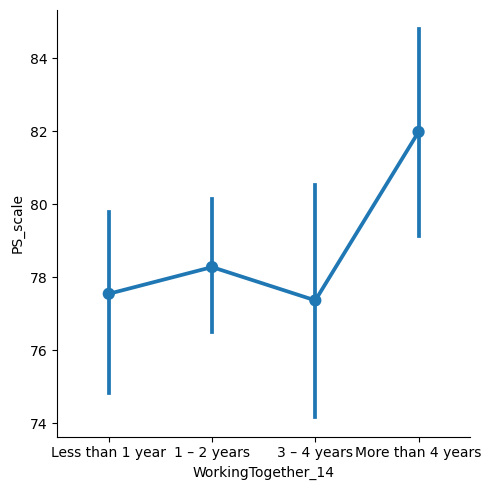

In [167]:
sns.catplot(data=sub_data, x="WorkingTogether_14", y="PS_scale", kind="point")

### Model 1

In [168]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['1 – 2 years', '3 – 4 years', 'More than 4 years', 'Gender', 'TeamSize_10']]
Y = sub_data['PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,77.4905,1.5017,51.6009,0.0000,0.0152,0.0045,74.5395,80.4416
1,1 – 2 years,0.7251,1.6081,0.4509,0.6523,0.0152,0.0045,-2.4350,3.8852
2,3 – 4 years,-0.2382,2.0288,-0.1174,0.9066,0.0152,0.0045,-4.2250,3.7486
3,More than 4 years,4.4090,1.9269,2.2881,0.0226,0.0152,0.0045,0.6224,8.1956
4,Gender,-0.1985,1.5742,-0.1261,0.8997,0.0152,0.0045,-3.2920,2.8949
5,TeamSize_10,0.0137,0.1010,0.1359,0.8919,0.0152,0.0045,-0.1847,0.2121


### Model 2

In [169]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['1 – 2 years', '3 – 4 years', 'More than 4 years', 'Gender', 'TeamSize_10', 'Outsourced', 'Mixed']]
Y = sub_data['PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,78.6042,1.5332,51.2667,0.0000,0.0373,0.0227,75.5912,81.6172
1,1 – 2 years,0.8952,1.6020,0.5588,0.5765,0.0373,0.0227,-2.2528,4.0433
2,3 – 4 years,0.0180,2.0222,0.0089,0.9929,0.0373,0.0227,-3.9558,3.9919
3,More than 4 years,4.4818,1.9145,2.3410,0.0197,0.0373,0.0227,0.7197,8.2440
4,Gender,-0.3665,1.5611,-0.2348,0.8145,0.0373,0.0227,-3.4343,2.7013
5,TeamSize_10,0.0486,0.1007,0.4824,0.6298,0.0373,0.0227,-0.1493,0.2464
6,Outsourced,-4.0297,1.4182,-2.8414,0.0047,0.0373,0.0227,-6.8166,-1.2428
7,Mixed,-4.6673,2.2278,-2.0951,0.0367,0.0373,0.0227,-9.0452,-0.2895


### Model 3

In [170]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['1 – 2 years', '3 – 4 years', 'More than 4 years', 'Gender', 'TeamSize_10', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,74.3212,2.0169,36.8486,0.0000,0.0751,0.0529,70.3576,78.2848
1,1 – 2 years,0.8391,1.5815,0.5305,0.5960,0.0751,0.0529,-2.2689,3.9471
2,3 – 4 years,-1.4662,2.0280,-0.7230,0.4701,0.0751,0.0529,-5.4515,2.5192
3,More than 4 years,2.2641,1.9881,1.1388,0.2554,0.0751,0.0529,-1.6429,6.1711
4,Gender,0.0393,1.5514,0.0254,0.9798,0.0751,0.0529,-3.0094,3.0881
5,TeamSize_10,0.0464,0.0995,0.4662,0.6413,0.0751,0.0529,-0.1491,0.2419
6,Outsourced,-3.2339,1.4118,-2.2907,0.0224,0.0751,0.0529,-6.0082,-0.4595
7,Mixed,-4.3181,2.2033,-1.9598,0.0506,0.0751,0.0529,-8.6480,0.0118
8,3 - 5 years,3.1926,1.8135,1.7604,0.0790,0.0751,0.0529,-0.3713,6.7564
9,6 - 8 years,7.2811,2.0566,3.5403,0.0004,0.0751,0.0529,3.2395,11.3228


### Model 4

In [171]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['1 – 2 years', '3 – 4 years', 'More than 4 years', 'Gender', 'TeamSize_10', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,72.2658,2.5816,27.9925,0.0000,0.0958,0.0638,67.1923,77.3392
1,1 – 2 years,1.1062,1.5904,0.6955,0.4871,0.0958,0.0638,-2.0194,4.2318
2,3 – 4 years,-1.2694,2.0267,-0.6263,0.5314,0.0958,0.0638,-5.2524,2.7136
3,More than 4 years,3.3005,2.0065,1.6449,0.1007,0.0958,0.0638,-0.6427,7.2436
4,Gender,0.0618,1.5630,0.0395,0.9685,0.0958,0.0638,-3.0098,3.1335
5,TeamSize_10,0.1016,0.1023,0.9927,0.3214,0.0958,0.0638,-0.0995,0.3027
6,Outsourced,-2.9144,1.4185,-2.0545,0.0405,0.0958,0.0638,-5.7020,-0.1267
7,Mixed,-4.0488,2.2016,-1.8390,0.0666,0.0958,0.0638,-8.3755,0.2778
8,3 - 5 years,2.8969,1.8156,1.5956,0.1113,0.0958,0.0638,-0.6711,6.4649
9,6 - 8 years,6.4339,2.0690,3.1096,0.0020,0.0958,0.0638,2.3678,10.5000


### Model 5

In [172]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['1 – 2 years', '3 – 4 years', 'More than 4 years', 'Gender', 'TeamSize_10', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other', 'Multiple teams']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,71.8320,2.7097,26.5087,0.0000,0.0964,0.0623,66.5067,77.1573
1,1 – 2 years,1.1443,1.5933,0.7182,0.4730,0.0964,0.0623,-1.9869,4.2756
2,3 – 4 years,-1.3304,2.0316,-0.6548,0.5129,0.0964,0.0623,-5.3230,2.6622
3,More than 4 years,3.3432,2.0097,1.6636,0.0969,0.0964,0.0623,-0.6062,7.2927
4,Gender,0.1182,1.5678,0.0754,0.9399,0.0964,0.0623,-2.9630,3.1994
5,TeamSize_10,0.0969,0.1028,0.9428,0.3463,0.0964,0.0623,-0.1051,0.2989
6,Outsourced,-2.8019,1.4353,-1.9521,0.0515,0.0964,0.0623,-5.6227,0.0189
7,Mixed,-3.9904,2.2061,-1.8088,0.0711,0.0964,0.0623,-8.3259,0.3451
8,3 - 5 years,2.9431,1.8191,1.6179,0.1064,0.0964,0.0623,-0.6318,6.5181
9,6 - 8 years,6.4441,2.0708,3.1119,0.0020,0.0964,0.0623,2.3745,10.5136


## Hypothesis 3 - Autonomy scale

### Baseline model

In [173]:
linear_regressor = LinearRegression()  # create object for the class
X = sub_data[['Autonomy_scale']]  # values converts it into a numpy array
Y = sub_data['PS_scale']
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,52.9161,2.8237,18.7399,0.0,0.1565,0.1547,47.3674,58.4649
1,Autonomy_scale,0.3458,0.0371,9.3098,0.0,0.1565,0.1547,0.2728,0.4188


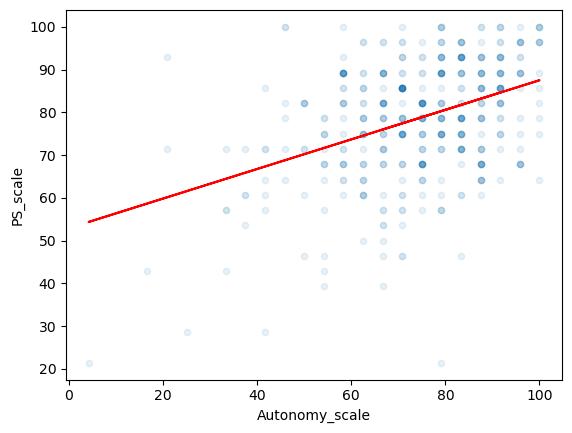

In [174]:
sub_data.plot.scatter(x='Autonomy_scale', y='PS_scale', alpha=.1)
plt.plot(X, Y_pred, color='red')
plt.show()

### Model 1

In [175]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['Autonomy_scale', 'Gender', 'TeamSize_10']]
Y = sub_data['PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,52.7251,2.9419,17.9218,0.0000,0.1567,0.1513,46.9439,58.5062
1,Autonomy_scale,0.3459,0.0372,9.2924,0.0000,0.1567,0.1513,0.2727,0.4190
2,Gender,-0.1661,1.4509,-0.1145,0.9089,0.1567,0.1513,-3.0172,2.6851
3,TeamSize_10,0.0269,0.0916,0.2935,0.7693,0.1567,0.1513,-0.1532,0.2070


### Model 2

In [176]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['Autonomy_scale', 'Gender', 'TeamSize_10', 'Outsourced', 'Mixed']]
Y = sub_data['PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,54.1990,2.9611,18.3036,0.0000,0.1738,0.1649,48.3801,60.0179
1,Autonomy_scale,0.3405,0.0370,9.2043,0.0000,0.1738,0.1649,0.2678,0.4132
2,Gender,-0.3123,1.4404,-0.2168,0.8285,0.1738,0.1649,-3.1429,2.5183
3,TeamSize_10,0.0582,0.0915,0.6362,0.5249,0.1738,0.1649,-0.1216,0.2381
4,Outsourced,-3.3724,1.3129,-2.5687,0.0105,0.1738,0.1649,-5.9524,-0.7924
5,Mixed,-4.4748,2.0459,-2.1872,0.0292,0.1738,0.1649,-8.4953,-0.4544


### Model 3

In [177]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['Autonomy_scale', 'Gender', 'TeamSize_10', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,51.4049,3.0999,16.5830,0.0000,0.2048,0.1892,45.3133,57.4966
1,Autonomy_scale,0.3268,0.0368,8.8882,0.0000,0.2048,0.1892,0.2545,0.3990
2,Gender,0.0032,1.4332,0.0022,0.9982,0.2048,0.1892,-2.8133,2.8197
3,TeamSize_10,0.0347,0.0908,0.3826,0.7022,0.2048,0.1892,-0.1436,0.2131
4,Outsourced,-2.6983,1.3064,-2.0654,0.0394,0.2048,0.1892,-5.2655,-0.1310
5,Mixed,-4.3083,2.0244,-2.1282,0.0338,0.2048,0.1892,-8.2865,-0.3302
6,3 - 5 years,2.2167,1.6777,1.3213,0.1871,0.2048,0.1892,-1.0802,5.5136
7,6 - 8 years,6.1703,1.8832,3.2765,0.0011,0.2048,0.1892,2.4695,9.8712
8,9 - 11 years,6.1284,2.2705,2.6991,0.0072,0.2048,0.1892,1.6665,10.5903
9,More than 12 years,5.7481,1.7937,3.2047,0.0014,0.2048,0.1892,2.2233,9.2729


### Model 4

In [178]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['Autonomy_scale', 'Gender', 'TeamSize_10', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,49.4318,3.5013,14.1183,0.0000,0.2193,0.1952,42.5511,56.3125
1,Autonomy_scale,0.3250,0.0368,8.8359,0.0000,0.2193,0.1952,0.2527,0.3972
2,Gender,-0.0455,1.4470,-0.0315,0.9749,0.2193,0.1952,-2.8892,2.7982
3,TeamSize_10,0.0695,0.0937,0.7415,0.4588,0.2193,0.1952,-0.1146,0.2536
4,Outsourced,-2.3228,1.3166,-1.7643,0.0784,0.2193,0.1952,-4.9101,0.2646
5,Mixed,-3.9753,2.0281,-1.9601,0.0506,0.2193,0.1952,-7.9609,0.0103
6,3 - 5 years,2.0448,1.6827,1.2152,0.2249,0.2193,0.1952,-1.2621,5.3516
7,6 - 8 years,5.6287,1.8951,2.9701,0.0031,0.2193,0.1952,1.9043,9.3530
8,9 - 11 years,5.3968,2.3077,2.3386,0.0198,0.2193,0.1952,0.8617,9.9318
9,More than 12 years,4.4223,1.8868,2.3439,0.0195,0.2193,0.1952,0.7144,8.1302


### Model 5

In [179]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['Autonomy_scale', 'Gender', 'TeamSize_10', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other', 'Multiple teams']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,48.7939,3.6041,13.5384,0.0000,0.2203,0.1944,41.7110,55.8767
1,Autonomy_scale,0.3263,0.0368,8.8577,0.0000,0.2203,0.1944,0.2539,0.3987
2,Gender,0.0319,1.4514,0.0220,0.9825,0.2203,0.1944,-2.8204,2.8842
3,TeamSize_10,0.0622,0.0942,0.6607,0.5092,0.2203,0.1944,-0.1229,0.2474
4,Outsourced,-2.1753,1.3317,-1.6335,0.1031,0.2203,0.1944,-4.7924,0.4417
5,Mixed,-3.9006,2.0315,-1.9201,0.0555,0.2203,0.1944,-7.8929,0.0917
6,3 - 5 years,2.0964,1.6849,1.2443,0.2140,0.2203,0.1944,-1.2147,5.4076
7,6 - 8 years,5.6319,1.8960,2.9703,0.0031,0.2203,0.1944,1.9058,9.3580
8,9 - 11 years,5.3636,2.3092,2.3227,0.0206,0.2203,0.1944,0.8255,9.9018
9,More than 12 years,4.4560,1.8882,2.3599,0.0187,0.2203,0.1944,0.7453,8.1667


## Hypothesis 5 - Openness in communication

### Baseline model

In [180]:
linear_regressor = LinearRegression()  # create object for the class
X = sub_data[['Openness_scale']]  # values converts it into a numpy array
Y = sub_data['PS_scale']
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,37.0215,2.7157,13.6325,0.0,0.3427,0.3413,31.6850,42.3579
1,Openness_scale,0.5373,0.0344,15.6040,0.0,0.3427,0.3413,0.4696,0.6049


In [181]:
X = sm.add_constant(sub_data[['Openness_scale']])
Y = sub_data['PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     173.9
Date:                Wed, 03 May 2023   Prob (F-statistic):           5.70e-34
Time:                        09:02:55   Log-Likelihood:                -1784.8
No. Observations:                 469   AIC:                             3574.
Df Residuals:                     467   BIC:                             3582.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             37.0215      3.305     11.203      0.000      30.544      43.499
Openness_scale     0.5373      0.041     13.185      0.000       0.457       0.617
==============================================================================
Omnibus:                       13.118   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.640
Skew:                          -0.417   Prob(JB):                      0.00109
Kurtosis:                       3.041   Cond. No.                         426.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

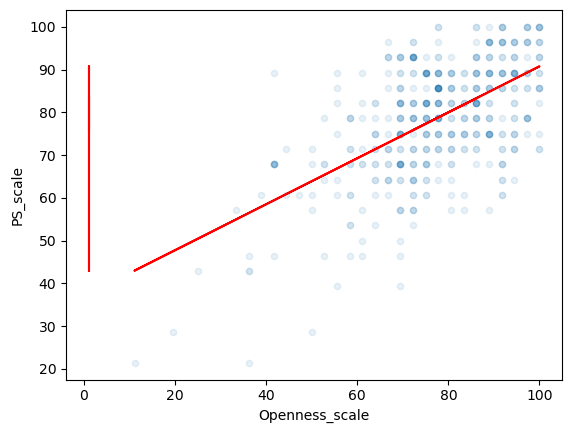

In [182]:
sub_data.plot.scatter(x='Openness_scale', y='PS_scale', alpha=.1)
plt.plot(X, Y_pred, color='red')
plt.show()

### Model 1

In [183]:
X = sm.add_constant(sub_data[['Openness_scale', 'Gender', 'TeamSize_10']])
Y = sub_data['PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     59.35
Date:                Wed, 03 May 2023   Prob (F-statistic):           1.68e-32
Time:                        09:02:55   Log-Likelihood:                -1784.5
No. Observations:                 469   AIC:                             3577.
Df Residuals:                     465   BIC:                             3594.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             37.3258      3.281     11.377      0.000      30.895      43.756
Openness_scale     0.5385      0.041     13.219      0.000       0.459       0.618
Gender            -0.7688      1.294     -0.594      0.552      -3.304       1.766
TeamSize_10       -0.0306      0.075     -0.409      0.682      -0.177       0.116
==============================================================================
Omnibus:                       12.904   Durbin-Watson:                   1.877
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.437
Skew:                          -0.414   Prob(JB):                      0.00121
Kurtosis:                       3.020   Cond. No.                         437.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### Model 2

In [184]:
X = sm.add_constant(sub_data[['Openness_scale', 'Gender', 'TeamSize_10', 'Outsourced', 'Mixed']])
Y = sub_data['PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     38.75
Date:                Wed, 03 May 2023   Prob (F-statistic):           3.08e-33
Time:                        09:02:55   Log-Likelihood:                -1780.3
No. Observations:                 469   AIC:                             3573.
Df Residuals:                     463   BIC:                             3597.
Df Model:                           5                                         
Covariance Type:                  HC0                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             38.6928      3.390     11.414      0.000      32.048      45.337
Openness_scale     0.5320      0.041     12.921      0.000       0.451       0.613
Gender            -0.8719      1.275     -0.684      0.494      -3.371       1.627
TeamSize_10       -0.0049      0.072     -0.068      0.946      -0.146       0.136
Outsourced        -2.5702      1.145     -2.244      0.025      -4.815      -0.326
Mixed             -4.1355      1.850     -2.235      0.025      -7.762      -0.509
==============================================================================
Omnibus:                       13.819   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.452
Skew:                          -0.430   Prob(JB):                     0.000727
Kurtosis:                       3.030   Cond. No.                         448.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### Model 3

In [185]:
X = sm.add_constant(sub_data[['Openness_scale', 'Gender', 'TeamSize_10', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years']])
Y = sub_data['PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     28.39
Date:                Wed, 03 May 2023   Prob (F-statistic):           3.52e-39
Time:                        09:02:55   Log-Likelihood:                -1766.6
No. Observations:                 469   AIC:                             3553.
Df Residuals:                     459   BIC:                             3595.
Df Model:                           9                                         
Covariance Type:                  HC0                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 34.0952      3.472      9.819      0.000      27.289      40.901
Openness_scale         0.5279      0.042     12.700      0.000       0.446       0.609
Gender                -0.5601      1.276     -0.439      0.661      -3.061       1.940
TeamSize_10           -0.0248      0.071     -0.351      0.725      -0.163       0.114
Outsourced            -1.8469      1.111     -1.662      0.096      -4.024       0.331
Mixed                 -4.0434      1.879     -2.152      0.031      -7.725      -0.361
3 - 5 years            4.0402      1.476      2.738      0.006       1.148       6.933
6 - 8 years            6.1079      1.572      3.885      0.000       3.027       9.189
9 - 11 years           7.4883      2.125      3.524      0.000       3.324      11.653
More than 12 years     7.3494      1.561      4.707      0.000       4.289      10.410
==============================================================================
Omnibus:                       15.494   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.101
Skew:                          -0.433   Prob(JB):                     0.000319
Kurtosis:                       3.272   Cond. No.                         538.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### Model 4

In [186]:
X = sm.add_constant(sub_data[['Openness_scale', 'Gender', 'TeamSize_10', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other']])
Y = sub_data['PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     20.92
Date:                Wed, 03 May 2023   Prob (F-statistic):           6.64e-41
Time:                        09:02:55   Log-Likelihood:                -1758.9
No. Observations:                 469   AIC:                             3548.
Df Residuals:                     454   BIC:                             3610.
Df Model:                          14                                         
Covariance Type:                  HC0                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       31.4529      3.746      8.395      0.000      24.110      38.796
Openness_scale               0.5319      0.040     13.396      0.000       0.454       0.610
Gender                      -0.4917      1.231     -0.399      0.690      -2.904       1.921
TeamSize_10                  0.0210      0.066      0.316      0.752      -0.109       0.151
Outsourced                  -1.5077      1.099     -1.371      0.170      -3.662       0.647
Mixed                       -3.6100      1.860     -1.941      0.052      -7.255       0.035
3 - 5 years                  3.8335      1.456      2.633      0.008       0.980       6.687
6 - 8 years                  5.5764      1.599      3.488      0.000       2.443       8.710
9 - 11 years                 6.8833      2.102      3.275      0.001       2.764      11.003
More than 12 years           6.1803      1.660      3.723      0.000       2.927       9.434
Software engineer            3.1802      1.783      1.783      0.075      -0.315       6.676
Senior software engineer     5.4250      1.950      2.781      0.005       1.602       9.248
Tech Lead                    2.2547      2.108      1.070      0.285      -1.876       6.385
QA                          -0.2624      1.910     -0.137      0.891      -4.007       3.482
Other                        1.7152      2.260      0.759      0.448      -2.715       6.146
==============================================================================
Omnibus:                       14.427   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.942
Skew:                          -0.408   Prob(JB):                     0.000569
Kurtosis:                       3.317   Cond. No.                         679.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### Model 5

In [187]:
X = sm.add_constant(sub_data[['Openness_scale', 'Gender', 'TeamSize_10', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other', 'Multiple teams']])
Y = sub_data['PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     19.60
Date:                Wed, 03 May 2023   Prob (F-statistic):           1.88e-40
Time:                        09:02:55   Log-Likelihood:                -1758.8
No. Observations:                 469   AIC:                             3550.
Df Residuals:                     453   BIC:                             3616.
Df Model:                          15                                         
Covariance Type:                  HC0                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       31.2225      3.819      8.175      0.000      23.737      38.708
Openness_scale               0.5319      0.040     13.381      0.000       0.454       0.610
Gender                      -0.4584      1.236     -0.371      0.711      -2.881       1.964
TeamSize_10                  0.0179      0.067      0.269      0.788      -0.113       0.149
Outsourced                  -1.4458      1.110     -1.302      0.193      -3.622       0.730
Mixed                       -3.5782      1.864     -1.919      0.055      -7.232       0.076
3 - 5 years                  3.8570      1.456      2.648      0.008       1.003       6.711
6 - 8 years                  5.5796      1.599      3.489      0.000       2.445       8.714
9 - 11 years                 6.8696      2.103      3.266      0.001       2.747      10.992
More than 12 years           6.1982      1.659      3.737      0.000       2.947       9.449
Software engineer            3.1563      1.768      1.785      0.074      -0.309       6.621
Senior software engineer     5.3700      1.930      2.783      0.005       1.588       9.152
Tech Lead                    2.1789      2.081      1.047      0.295      -1.901       6.258
QA                          -0.3062      1.895     -0.162      0.872      -4.020       3.408
Other                        1.6664      2.244      0.742      0.458      -2.732       6.065
Multiple teams               0.3893      0.976      0.399      0.690      -1.523       2.302
==============================================================================
Omnibus:                       14.928   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.526
Skew:                          -0.414   Prob(JB):                     0.000425
Kurtosis:                       3.330   Cond. No.                         680.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [188]:
NyX = sm.add_constant(X)

ols_robust=sm.OLS(Y, NyX).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     19.60
Date:                Wed, 03 May 2023   Prob (F-statistic):           1.88e-40
Time:                        09:02:55   Log-Likelihood:                -1758.8
No. Observations:                 469   AIC:                             3550.
Df Residuals:                     453   BIC:                             3616.
Df Model:                          15                                         
Covariance Type:                  HC0                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       31.2225      3.819      8.175      0.000      23.737      38.708
Openness_scale               0.5319      0.040     13.381      0.000       0.454       0.610
Gender                      -0.4584      1.236     -0.371      0.711      -2.881       1.964
TeamSize_10                  0.0179      0.067      0.269      0.788      -0.113       0.149
Outsourced                  -1.4458      1.110     -1.302      0.193      -3.622       0.730
Mixed                       -3.5782      1.864     -1.919      0.055      -7.232       0.076
3 - 5 years                  3.8570      1.456      2.648      0.008       1.003       6.711
6 - 8 years                  5.5796      1.599      3.489      0.000       2.445       8.714
9 - 11 years                 6.8696      2.103      3.266      0.001       2.747      10.992
More than 12 years           6.1982      1.659      3.737      0.000       2.947       9.449
Software engineer            3.1563      1.768      1.785      0.074      -0.309       6.621
Senior software engineer     5.3700      1.930      2.783      0.005       1.588       9.152
Tech Lead                    2.1789      2.081      1.047      0.295      -1.901       6.258
QA                          -0.3062      1.895     -0.162      0.872      -4.020       3.408
Other                        1.6664      2.244      0.742      0.458      -2.732       6.065
Multiple teams               0.3893      0.976      0.399      0.690      -1.523       2.302
==============================================================================
Omnibus:                       14.928   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.526
Skew:                          -0.414   Prob(JB):                     0.000425
Kurtosis:                       3.330   Cond. No.                         680.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

## Hypothesis 6 - Leadership

### Baseline model: 

In [189]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['Leadership_scale']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,53.6353,2.2238,24.1188,0.0,0.224,0.2224,49.2654,58.0052
1,Leadership_scale,0.3441,0.0296,11.6110,0.0,0.224,0.2224,0.2859,0.4024


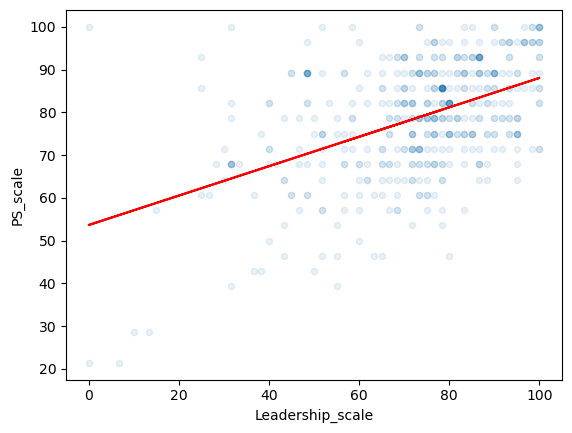

In [190]:
sub_data.plot.scatter(x='Leadership_scale', y='PS_scale', alpha=.1)
plt.plot(X, Y_pred, color='red')
plt.show()

### Model 1

In [191]:
X = sm.add_constant(sub_data[['Leadership_scale', 'Gender', 'TeamSize_10']])
Y = sub_data.loc[:, 'PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     20.89
Date:                Wed, 03 May 2023   Prob (F-statistic):           1.03e-12
Time:                        09:02:55   Log-Likelihood:                -1823.6
No. Observations:                 469   AIC:                             3655.
Df Residuals:                     465   BIC:                             3672.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               53.8877      3.473     15.514      0.000      47.080      60.696
Leadership_scale     0.3449      0.045      7.667      0.000       0.257       0.433
Gender              -0.6283      1.485     -0.423      0.672      -3.539       2.282
TeamSize_10         -0.0228      0.083     -0.275      0.784      -0.186       0.140
==============================================================================
Omnibus:                        5.902   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                6.173
Skew:                          -0.194   Prob(JB):                       0.0457
Kurtosis:                       3.406   Cond. No.                         320.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### Model 2

In [192]:
X = sm.add_constant(sub_data[['Leadership_scale', 'Gender', 'TeamSize_10', 'Outsourced', 'Mixed']])
Y = sub_data.loc[:, 'PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     17.27
Date:                Wed, 03 May 2023   Prob (F-statistic):           1.11e-15
Time:                        09:02:55   Log-Likelihood:                -1820.0
No. Observations:                 469   AIC:                             3652.
Df Residuals:                     463   BIC:                             3677.
Df Model:                           5                                         
Covariance Type:                  HC0                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               55.1604      3.633     15.183      0.000      48.040      62.281
Leadership_scale     0.3390      0.046      7.446      0.000       0.250       0.428
Gender              -0.7231      1.449     -0.499      0.618      -3.563       2.117
TeamSize_10          0.0023      0.080      0.029      0.977      -0.154       0.159
Outsourced          -2.4081      1.225     -1.966      0.049      -4.808      -0.008
Mixed               -4.3838      1.988     -2.205      0.027      -8.281      -0.487
==============================================================================
Omnibus:                        7.329   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.474
Skew:                          -0.247   Prob(JB):                       0.0238
Kurtosis:                       3.371   Cond. No.                         337.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### Model 3

In [193]:
X = sm.add_constant(sub_data[['Leadership_scale', 'Gender', 'TeamSize_10', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years']])
Y = sub_data.loc[:, 'PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     15.92
Date:                Wed, 03 May 2023   Prob (F-statistic):           9.29e-23
Time:                        09:02:55   Log-Likelihood:                -1804.6
No. Observations:                 469   AIC:                             3629.
Df Residuals:                     459   BIC:                             3671.
Df Model:                           9                                         
Covariance Type:                  HC0                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 50.1357      3.532     14.195      0.000      43.213      57.058
Leadership_scale       0.3429      0.045      7.681      0.000       0.255       0.430
Gender                -0.4107      1.479     -0.278      0.781      -3.310       2.489
TeamSize_10           -0.0312      0.078     -0.399      0.690      -0.184       0.122
Outsourced            -1.4584      1.160     -1.257      0.209      -3.732       0.816
Mixed                 -4.0945      2.000     -2.047      0.041      -8.015      -0.174
3 - 5 years            2.8336      1.501      1.888      0.059      -0.108       5.775
6 - 8 years            6.4515      1.717      3.758      0.000       3.086       9.817
9 - 11 years           7.9107      2.288      3.458      0.001       3.427      12.394
More than 12 years     7.9188      1.707      4.638      0.000       4.573      11.265
==============================================================================
Omnibus:                       11.015   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.547
Skew:                          -0.320   Prob(JB):                      0.00311
Kurtosis:                       3.424   Cond. No.                         473.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### Model 4

In [194]:

X = sm.add_constant(sub_data[['Leadership_scale', 'Gender', 'TeamSize_10', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other']])
Y = sub_data.loc[:, 'PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     11.32
Date:                Wed, 03 May 2023   Prob (F-statistic):           2.07e-22
Time:                        09:02:55   Log-Likelihood:                -1801.3
No. Observations:                 469   AIC:                             3633.
Df Residuals:                     454   BIC:                             3695.
Df Model:                          14                                         
Covariance Type:                  HC0                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       48.0624      3.964     12.126      0.000      40.294      55.831
Leadership_scale             0.3394      0.044      7.765      0.000       0.254       0.425
Gender                      -0.5085      1.463     -0.348      0.728      -3.376       2.359
TeamSize_10                 -0.0087      0.074     -0.117      0.907      -0.154       0.137
Outsourced                  -1.1580      1.173     -0.987      0.323      -3.457       1.141
Mixed                       -3.7483      1.975     -1.898      0.058      -7.619       0.122
3 - 5 years                  2.7301      1.493      1.828      0.068      -0.197       5.657
6 - 8 years                  6.0974      1.757      3.470      0.001       2.653       9.542
9 - 11 years                 7.4394      2.275      3.271      0.001       2.981      11.898
More than 12 years           6.9988      1.822      3.842      0.000       3.428      10.569
Software engineer            2.7738      1.897      1.462      0.144      -0.944       6.491
Senior software engineer     4.7574      2.104      2.261      0.024       0.634       8.881
Tech Lead                    2.5806      2.330      1.107      0.268      -1.987       7.148
QA                           1.2373      2.069      0.598      0.550      -2.819       5.293
Other                        1.9790      2.419      0.818      0.413      -2.762       6.720
==============================================================================
Omnibus:                        9.431   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.663
Skew:                          -0.298   Prob(JB):                      0.00798
Kurtosis:                       3.373   Cond. No.                         626.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### Model 5

In [195]:
X = sm.add_constant(sub_data[['Leadership_scale', 'Gender', 'TeamSize_10', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other', 'Multiple teams']])
Y = sub_data.loc[:, 'PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     10.58
Date:                Wed, 03 May 2023   Prob (F-statistic):           5.89e-22
Time:                        09:02:56   Log-Likelihood:                -1801.0
No. Observations:                 469   AIC:                             3634.
Df Residuals:                     453   BIC:                             3700.
Df Model:                          15                                         
Covariance Type:                  HC0                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       47.4772      3.972     11.952      0.000      39.691      55.263
Leadership_scale             0.3402      0.044      7.807      0.000       0.255       0.426
Gender                      -0.4343      1.478     -0.294      0.769      -3.331       2.462
TeamSize_10                 -0.0158      0.076     -0.209      0.834      -0.164       0.132
Outsourced                  -1.0131      1.181     -0.857      0.391      -3.329       1.303
Mixed                       -3.6754      1.980     -1.856      0.063      -7.556       0.205
3 - 5 years                  2.7831      1.494      1.863      0.062      -0.144       5.710
6 - 8 years                  6.1033      1.757      3.474      0.001       2.660       9.546
9 - 11 years                 7.4127      2.265      3.273      0.001       2.974      11.851
More than 12 years           7.0409      1.824      3.860      0.000       3.465      10.616
Software engineer            2.7210      1.878      1.449      0.147      -0.959       6.401
Senior software engineer     4.6314      2.087      2.220      0.026       0.542       8.721
Tech Lead                    2.4085      2.309      1.043      0.297      -2.118       6.935
QA                           1.1408      2.060      0.554      0.580      -2.897       5.178
Other                        1.8731      2.415      0.776      0.438      -2.860       6.607
Multiple teams               0.8850      1.063      0.832      0.405      -1.199       2.969
==============================================================================
Omnibus:                        9.892   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               10.114
Skew:                          -0.311   Prob(JB):                      0.00636
Kurtosis:                       3.363   Cond. No.                         627.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

## Hypothesis 8 - Clear decision process

### Baseline model: 

In [196]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['ClearDecisions_scale']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,36.5012,3.0328,12.0356,0.0,0.2989,0.2974,30.5417,42.4608
1,ClearDecisions_scale,0.5472,0.0388,14.1108,0.0,0.2989,0.2974,0.4710,0.6234


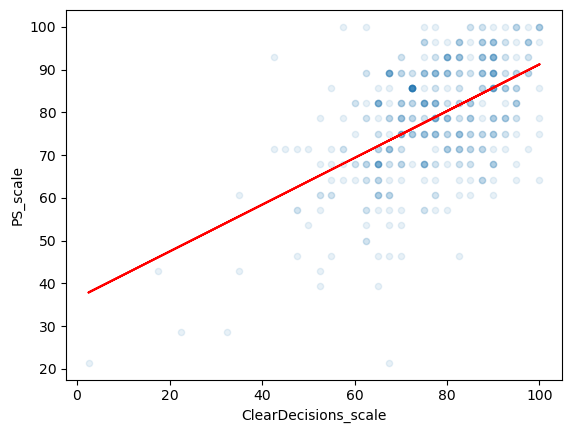

In [197]:
sub_data.plot.scatter(x='ClearDecisions_scale', y='PS_scale', alpha=.1)
plt.plot(X, Y_pred, color='red')
plt.show()

### Model 1

In [198]:
X = sm.add_constant(sub_data[['ClearDecisions_scale', 'Gender', 'TeamSize_10']])
Y = sub_data.loc[:, 'PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     51.06
Date:                Wed, 03 May 2023   Prob (F-statistic):           1.53e-28
Time:                        09:02:56   Log-Likelihood:                -1799.9
No. Observations:                 469   AIC:                             3608.
Df Residuals:                     465   BIC:                             3624.
Df Model:                           3                                         
Covariance Type:                  HC0                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   36.4305      3.560     10.232      0.000      29.452      43.409
ClearDecisions_scale     0.5472      0.044     12.324      0.000       0.460       0.634
Gender                  -0.1898      1.364     -0.139      0.889      -2.863       2.484
TeamSize_10              0.0136      0.069      0.196      0.845      -0.122       0.149
==============================================================================
Omnibus:                       23.749   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.372
Skew:                          -0.499   Prob(JB):                     1.14e-06
Kurtosis:                       3.638   Cond. No.                         471.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### Model 2

In [199]:
X = sm.add_constant(sub_data[['ClearDecisions_scale', 'Gender', 'TeamSize_10', 'Outsourced', 'Mixed']])
Y = sub_data.loc[:, 'PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     36.09
Date:                Wed, 03 May 2023   Prob (F-statistic):           3.30e-31
Time:                        09:02:56   Log-Likelihood:                -1796.8
No. Observations:                 469   AIC:                             3606.
Df Residuals:                     463   BIC:                             3630.
Df Model:                           5                                         
Covariance Type:                  HC0                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   37.9428      3.698     10.261      0.000      30.695      45.190
ClearDecisions_scale     0.5378      0.045     12.013      0.000       0.450       0.626
Gender                  -0.2961      1.350     -0.219      0.826      -2.942       2.350
TeamSize_10              0.0369      0.070      0.527      0.598      -0.100       0.174
Outsourced              -2.4647      1.166     -2.113      0.035      -4.751      -0.179
Mixed                   -3.3959      1.722     -1.972      0.049      -6.770      -0.021
==============================================================================
Omnibus:                       29.149   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.203
Skew:                          -0.555   Prob(JB):                     2.27e-08
Kurtosis:                       3.754   Cond. No.                         483.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### Model 3

In [200]:
X = sm.add_constant(sub_data[['ClearDecisions_scale', 'Gender', 'TeamSize_10', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years']])
Y = sub_data.loc[:, 'PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     22.77
Date:                Wed, 03 May 2023   Prob (F-statistic):           4.42e-32
Time:                        09:02:56   Log-Likelihood:                -1788.4
No. Observations:                 469   AIC:                             3597.
Df Residuals:                     459   BIC:                             3638.
Df Model:                           9                                         
Covariance Type:                  HC0                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   35.6522      3.751      9.504      0.000      28.300      43.005
ClearDecisions_scale     0.5214      0.046     11.340      0.000       0.431       0.611
Gender                  -0.0268      1.373     -0.019      0.984      -2.717       2.663
TeamSize_10              0.0172      0.071      0.241      0.810      -0.123       0.157
Outsourced              -1.8870      1.134     -1.664      0.096      -4.109       0.335
Mixed                   -3.2923      1.744     -1.888      0.059      -6.710       0.126
3 - 5 years              2.3065      1.524      1.514      0.130      -0.680       5.293
6 - 8 years              5.3300      1.694      3.147      0.002       2.011       8.649
9 - 11 years             5.6760      2.091      2.714      0.007       1.577       9.775
More than 12 years       5.4093      1.701      3.181      0.001       2.076       8.743
==============================================================================
Omnibus:                       36.070   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.015
Skew:                          -0.585   Prob(JB):                     1.38e-11
Kurtosis:                       4.091   Cond. No.                         536.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### Model 4

In [201]:
X = sm.add_constant(sub_data[['ClearDecisions_scale', 'Gender', 'TeamSize_10', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other']])
Y = sub_data.loc[:, 'PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     16.06
Date:                Wed, 03 May 2023   Prob (F-statistic):           6.37e-32
Time:                        09:02:56   Log-Likelihood:                -1782.4
No. Observations:                 469   AIC:                             3595.
Df Residuals:                     454   BIC:                             3657.
Df Model:                          14                                         
Covariance Type:                  HC0                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       33.1696      4.006      8.279      0.000      25.317      41.022
ClearDecisions_scale         0.5221      0.044     11.748      0.000       0.435       0.609
Gender                      -0.1127      1.320     -0.085      0.932      -2.699       2.474
TeamSize_10                  0.0523      0.073      0.714      0.475      -0.091       0.196
Outsourced                  -1.4968      1.133     -1.321      0.186      -3.717       0.723
Mixed                       -2.8759      1.736     -1.657      0.097      -6.277       0.526
3 - 5 years                  2.0980      1.522      1.378      0.168      -0.886       5.082
6 - 8 years                  4.7609      1.708      2.788      0.005       1.414       8.108
9 - 11 years                 4.9153      2.054      2.393      0.017       0.889       8.942
More than 12 years           4.0734      1.834      2.221      0.026       0.479       7.668
Software engineer            2.8445      1.760      1.616      0.106      -0.606       6.294
Senior software engineer     5.9099      1.980      2.985      0.003       2.029       9.791
Tech Lead                    2.7374      2.157      1.269      0.204      -1.490       6.965
QA                           0.9116      1.906      0.478      0.632      -2.824       4.647
Other                        1.7547      2.265      0.775      0.438      -2.684       6.194
==============================================================================
Omnibus:                       33.513   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.952
Skew:                          -0.576   Prob(JB):                     2.86e-10
Kurtosis:                       3.961   Cond. No.                         682.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

### Model 5

In [202]:
X = sm.add_constant(sub_data[['ClearDecisions_scale', 'Gender', 'TeamSize_10', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other', 'Multiple teams']])
Y = sub_data.loc[:, 'PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     15.10
Date:                Wed, 03 May 2023   Prob (F-statistic):           1.31e-31
Time:                        09:02:56   Log-Likelihood:                -1782.0
No. Observations:                 469   AIC:                             3596.
Df Residuals:                     453   BIC:                             3663.
Df Model:                          15                                         
Covariance Type:                  HC0                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       32.4936      4.169      7.794      0.000      24.323      40.665
ClearDecisions_scale         0.5234      0.045     11.711      0.000       0.436       0.611
Gender                      -0.0300      1.332     -0.023      0.982      -2.640       2.580
TeamSize_10                  0.0446      0.073      0.607      0.544      -0.099       0.189
Outsourced                  -1.3387      1.165     -1.149      0.251      -3.622       0.945
Mixed                       -2.7936      1.731     -1.614      0.107      -6.187       0.599
3 - 5 years                  2.1547      1.520      1.418      0.156      -0.824       5.133
6 - 8 years                  4.7641      1.708      2.789      0.005       1.416       8.113
9 - 11 years                 4.8793      2.045      2.385      0.017       0.870       8.888
More than 12 years           4.1123      1.835      2.242      0.025       0.517       7.708
Software engineer            2.7865      1.741      1.601      0.109      -0.625       6.198
Senior software engineer     5.7745      1.967      2.936      0.003       1.920       9.629
Tech Lead                    2.5487      2.133      1.195      0.232      -1.632       6.730
QA                           0.8045      1.888      0.426      0.670      -2.896       4.505
Other                        1.6374      2.250      0.728      0.467      -2.773       6.047
Multiple teams               0.9725      1.063      0.915      0.360      -1.111       3.056
==============================================================================
Omnibus:                       35.286   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.605
Skew:                          -0.587   Prob(JB):                     4.60e-11
Kurtosis:                       4.029   Cond. No.                         684.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

## Hypothesis 9 - Clear Feedback

### Baseline model: 

In [203]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['ClearFeedback_scale']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,45.1062,2.5324,17.8113,0.0,0.2821,0.2805,40.1298,50.0826
1,ClearFeedback_scale,0.4297,0.0317,13.5461,0.0,0.2821,0.2805,0.3673,0.4920


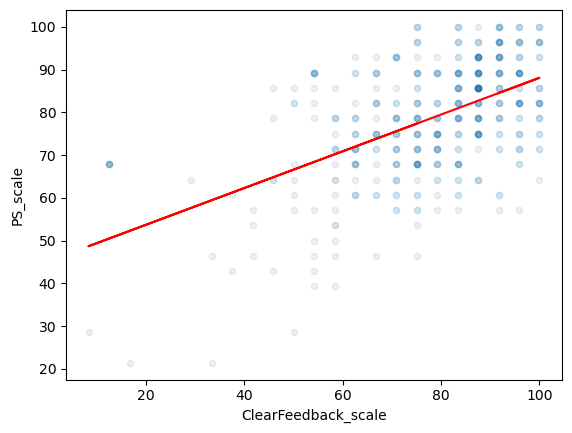

In [204]:
sub_data.plot.scatter(x='ClearFeedback_scale', y='PS_scale', alpha=.1)
plt.plot(X, Y_pred, color='red')
plt.show()

### Model 1

In [205]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['ClearFeedback_scale', 'Gender', 'TeamSize_10']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,44.8687,2.6435,16.9733,0.0000,0.2828,0.2781,39.6740,50.0634
1,ClearFeedback_scale,0.4303,0.0318,13.5362,0.0000,0.2828,0.2781,0.3678,0.4927
2,Gender,-0.6397,1.3386,-0.4779,0.6329,0.2828,0.2781,-3.2701,1.9907
3,TeamSize_10,0.0386,0.0845,0.4571,0.6478,0.2828,0.2781,-0.1275,0.2047


### Model 2

In [206]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['ClearFeedback_scale', 'Gender', 'TeamSize_10', 'Outsourced', 'Mixed']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,46.2658,2.6976,17.1505,0.0000,0.2919,0.2843,40.9647,51.5669
1,ClearFeedback_scale,0.4224,0.0318,13.2690,0.0000,0.2919,0.2843,0.3598,0.4850
2,Gender,-0.7363,1.3339,-0.5520,0.5812,0.2919,0.2843,-3.3574,1.8849
3,TeamSize_10,0.0612,0.0847,0.7225,0.4703,0.2919,0.2843,-0.1053,0.2277
4,Outsourced,-2.4310,1.2198,-1.9930,0.0468,0.2919,0.2843,-4.8279,-0.0341
5,Mixed,-3.3772,1.8963,-1.7810,0.0756,0.2919,0.2843,-7.1036,0.3491


### Model 3

In [207]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['ClearFeedback_scale', 'Gender', 'TeamSize_10', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,41.1118,2.8978,14.1875,0.0000,0.3347,0.3217,35.4173,46.8064
1,ClearFeedback_scale,0.4212,0.0310,13.5679,0.0000,0.3347,0.3217,0.3602,0.4822
2,Gender,-0.2792,1.3112,-0.2129,0.8315,0.3347,0.3217,-2.8559,2.2975
3,TeamSize_10,0.0408,0.0830,0.4912,0.6235,0.3347,0.3217,-0.1224,0.2039
4,Outsourced,-1.6372,1.1994,-1.3650,0.1729,0.3347,0.3217,-3.9942,0.7198
5,Mixed,-3.2495,1.8533,-1.7533,0.0802,0.3347,0.3217,-6.8916,0.3926
6,3 - 5 years,4.0334,1.5333,2.6306,0.0088,0.3347,0.3217,1.0203,7.0465
7,6 - 8 years,7.4678,1.7186,4.3452,0.0000,0.3347,0.3217,4.0904,10.8451
8,9 - 11 years,7.1104,2.0768,3.4237,0.0007,0.3347,0.3217,3.0292,11.1917
9,More than 12 years,7.6724,1.6280,4.7127,0.0000,0.3347,0.3217,4.4730,10.8717


### Model 4

In [208]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['ClearFeedback_scale', 'Gender', 'TeamSize_10', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,38.3092,3.3074,11.5829,0.0000,0.346,0.3258,31.8095,44.8089
1,ClearFeedback_scale,0.4211,0.0313,13.4590,0.0000,0.346,0.3258,0.3596,0.4826
2,Gender,-0.2959,1.3247,-0.2233,0.8234,0.346,0.3258,-2.8991,2.3074
3,TeamSize_10,0.0641,0.0857,0.7472,0.4553,0.346,0.3258,-0.1044,0.2326
4,Outsourced,-1.3663,1.2090,-1.1301,0.2590,0.346,0.3258,-3.7422,1.0096
5,Mixed,-2.9094,1.8581,-1.5658,0.1181,0.346,0.3258,-6.5610,0.7421
6,3 - 5 years,4.0407,1.5404,2.6232,0.0090,0.346,0.3258,1.0135,7.0678
7,6 - 8 years,7.2921,1.7320,4.2103,0.0000,0.346,0.3258,3.8884,10.6958
8,9 - 11 years,7.0397,2.1145,3.3293,0.0009,0.346,0.3258,2.8843,11.1951
9,More than 12 years,7.1586,1.7152,4.1736,0.0000,0.346,0.3258,3.7879,10.5293


### Model 5

In [209]:
linear_regressor = LinearRegression()  # create object for the class

X = sub_data[['ClearFeedback_scale', 'Gender', 'TeamSize_10', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other', 'Multiple teams']]
Y = sub_data.loc[:, 'PS_scale']

linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

ln = pg.linear_regression(X,Y)
ln.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,38.5224,3.3493,11.5017,0.0000,0.3462,0.3246,31.9404,45.1045
1,ClearFeedback_scale,0.4219,0.0314,13.4486,0.0000,0.3462,0.3246,0.3602,0.4835
2,Gender,-0.3365,1.3294,-0.2531,0.8003,0.3462,0.3246,-2.9491,2.2761
3,TeamSize_10,0.0677,0.0863,0.7848,0.4330,0.3462,0.3246,-0.1018,0.2372
4,Outsourced,-1.4374,1.2219,-1.1764,0.2401,0.3462,0.3246,-3.8388,0.9639
5,Mixed,-2.9454,1.8618,-1.5820,0.1143,0.3462,0.3246,-6.6042,0.7134
6,3 - 5 years,4.0147,1.5430,2.6019,0.0096,0.3462,0.3246,0.9824,7.0471
7,6 - 8 years,7.2894,1.7336,4.2049,0.0000,0.3462,0.3246,3.8826,10.6963
8,9 - 11 years,7.0586,2.1169,3.3344,0.0009,0.3462,0.3246,2.8984,11.2187
9,More than 12 years,7.1385,1.7174,4.1565,0.0000,0.3462,0.3246,3.7634,10.5136


# 8. Heteroscedasticity

## Heteroscedasticity in control variables

### Team_size

In [210]:
#define response variable
y = sub_data['PS_scale']

#define predictor variables
x = sub_data['TeamSize_10']

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

In [211]:
#perform White's test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 0.3555167885330677, 'Test Statistic p-value': 0.8371446580063897, 'F-Statistic': 0.17675533308440014, 'F-Test p-value': 0.8380409418316723}


## Heteroscedasticity in X_scales

### Colocated

In [212]:
#define response variable
y = sub_data['PS_scale']

#define predictor variables
x = sub_data[['Less than 1 day per week', '1-2 days per week', '3-4 days per week', 'Always']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()


In [213]:
#perform White's test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))



{'Test Statistic': 2.454234986236533, 'Test Statistic p-value': 0.48361864808546406, 'F-Statistic': 0.8153678618333111, 'F-Test p-value': 0.48580684061742596}


### Working together

In [214]:
#define response variable
y = sub_data['PS_scale']

#define predictor variables
x = sub_data[['Less than 1 year', '1 – 2 years', '3 – 4 years', 'More than 4 years']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

In [215]:
#perform White's test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))



{'Test Statistic': 1.0707690848736715, 'Test Statistic p-value': 0.7841348118553622, 'F-Statistic': 0.35468869476445786, 'F-Test p-value': 0.7857728643830151}


### Autonomy scale

In [216]:
#define response variable
y = sub_data['PS_scale']

#define predictor variables
x = sub_data['Autonomy_scale']

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

In [217]:
#perform White's test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))


{'Test Statistic': 23.087119477263553, 'Test Statistic p-value': 9.69830200671959e-06, 'F-Statistic': 12.06356459561415, 'F-Test p-value': 7.7979727399869e-06}


### Openness scale

In [218]:
#define response variable
y = sub_data['PS_scale']

#define predictor variables
x = sub_data['Openness_scale']

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

In [219]:
#perform White's test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 18.173756014671063, 'Test Statistic p-value': 0.00011314074228158673, 'F-Statistic': 9.392721049212383, 'F-Test p-value': 0.00010020026141677878}


### Leadership scale

In [220]:
#define response variable
y = sub_data['PS_scale']

#define predictor variables
x = sub_data['Leadership_scale']

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

In [221]:
#perform White's test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 110.03170167467789, 'Test Statistic p-value': 1.279144371335109e-24, 'F-Statistic': 71.41963958880166, 'F-Test p-value': 8.806393427107989e-28}


### Clear decisions scale

In [222]:
#define response variable
y = sub_data['PS_scale']

#define predictor variables
x = sub_data['ClearDecisions_scale']

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

In [223]:
#perform White's test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 8.897274126954448, 'Test Statistic p-value': 0.011694494967812141, 'F-Statistic': 4.505656574076465, 'F-Test p-value': 0.011531810641633207}


### Clear feedback scale

In [224]:
#define response variable
y = sub_data['PS_scale']

#define predictor variables
x = sub_data['ClearFeedback_scale']

#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

In [225]:
#perform White's test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 49.04157596386266, 'Test Statistic p-value': 2.2426272117804892e-11, 'F-Statistic': 27.20909153282454, 'F-Test p-value': 6.66491961643708e-12}


# 9. Multikolonaritet

In [226]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
  
# the independent variables set
X = sub_data[['Gender', 'TeamSize_10', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other', 'Multiple teams']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                     feature       VIF
0                     Gender  1.289380
1                TeamSize_10  2.882330
2                 Outsourced  1.417610
3                      Mixed  1.145566
4                3 - 5 years  2.087694
5                6 - 8 years  1.701071
6               9 - 11 years  1.420309
7         More than 12 years  2.192256
8          Software engineer  2.349263
9   Senior software engineer  2.168875
10                 Tech Lead  1.582834
11                        QA  2.102447
12                     Other  1.609588
13            Multiple teams  2.840786


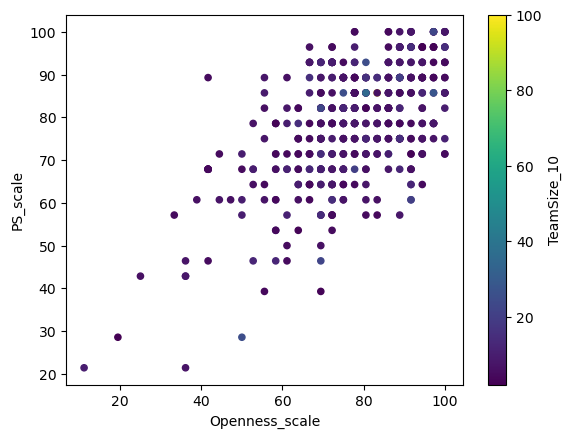

In [227]:
ax1 = sub_data.plot.scatter(x='Openness_scale',
                      y='PS_scale', 
                      c='TeamSize_10',
                      colormap='viridis')

# 10. Test Scales

In [228]:
Scales = sub_data[['Autonomy_scale', 'Openness_scale', 'Leadership_scale', 'ClearDecisions_scale', 'ClearFeedback_scale']]

In [229]:
Scales.corr()

,Autonomy_scale,Openness_scale,Leadership_scale,ClearDecisions_scale,ClearFeedback_scale
Autonomy_scale,1.000000,0.489586,0.415736,0.905668,0.356044
Openness_scale,0.489586,1.000000,0.577755,0.685800,0.680174
Leadership_scale,0.415736,0.577755,1.000000,0.533513,0.591005
ClearDecisions_scale,0.905668,0.685800,0.533513,1.000000,0.550289
ClearFeedback_scale,0.356044,0.680174,0.591005,0.550289,1.000000


<Axes: >

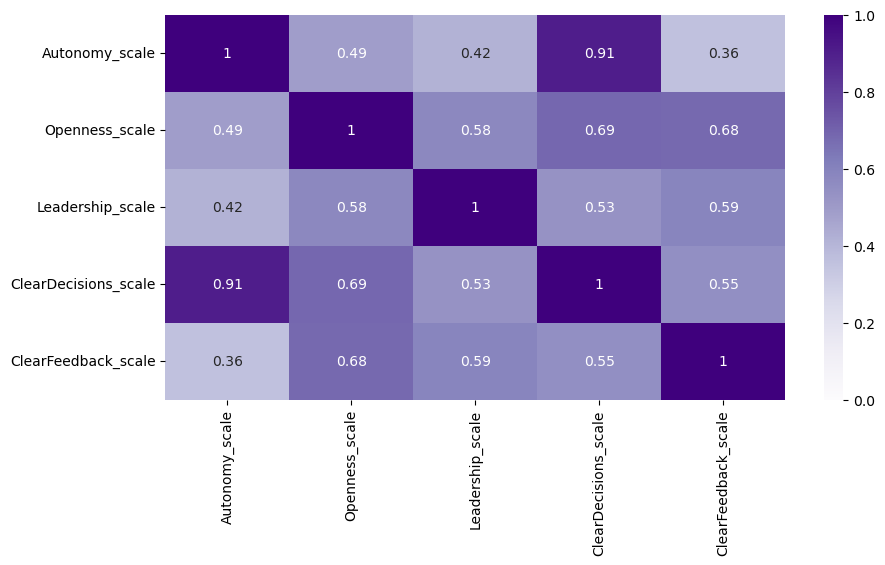

In [230]:
plt.figure(figsize=(10,5))
c = Scales.corr()
sns.heatmap(c, vmin=0, vmax=1, annot=True, cmap="Purples")

In [231]:
X = sm.add_constant(sub_data['Autonomy_scale'])
Y = sub_data['PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     53.87
Date:                Wed, 03 May 2023   Prob (F-statistic):           9.58e-13
Time:                        09:02:57   Log-Likelihood:                -1843.3
No. Observations:                 469   AIC:                             3691.
Df Residuals:                     467   BIC:                             3699.
Df Model:                           1                                         
Covariance Type:                  HC0                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             52.9161      3.689     14.345      0.000      45.686      60.146
Autonomy_scale     0.3458      0.047      7.340      0.000       0.253       0.438
==============================================================================
Omnibus:                       36.401   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.655
Skew:                          -0.626   Prob(JB):                     7.40e-11
Kurtosis:                       3.905   Cond. No.                         377.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [232]:
X = sm.add_constant(sub_data[['Autonomy_scale', 'Openness_scale']])
Y = sub_data['PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     102.9
Date:                Wed, 03 May 2023   Prob (F-statistic):           9.93e-38
Time:                        09:02:57   Log-Likelihood:                -1779.2
No. Observations:                 469   AIC:                             3564.
Df Residuals:                     466   BIC:                             3577.
Df Model:                           2                                         
Covariance Type:                  HC0                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             32.6831      3.415      9.571      0.000      25.990      39.376
Autonomy_scale     0.1254      0.043      2.933      0.003       0.042       0.209
Openness_scale     0.4728      0.045     10.485      0.000       0.384       0.561
==============================================================================
Omnibus:                       13.608   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.092
Skew:                          -0.422   Prob(JB):                     0.000871
Kurtosis:                       3.100   Cond. No.                         652.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [233]:
X = sm.add_constant(sub_data[['Autonomy_scale', 'Openness_scale', 'Leadership_scale', 'ClearDecisions_scale']])
Y = sub_data['PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     71.72
Date:                Wed, 03 May 2023   Prob (F-statistic):           2.84e-47
Time:                        09:02:57   Log-Likelihood:                -1758.9
No. Observations:                 469   AIC:                             3528.
Df Residuals:                     464   BIC:                             3549.
Df Model:                           4                                         
Covariance Type:                  HC0                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   28.5254      3.074      9.279      0.000      22.500      34.550
Autonomy_scale          -0.2678      0.090     -2.982      0.003      -0.444      -0.092
Openness_scale           0.2408      0.059      4.094      0.000       0.126       0.356
Leadership_scale         0.1071      0.040      2.680      0.007       0.029       0.185
ClearDecisions_scale     0.5662      0.123      4.599      0.000       0.325       0.807
==============================================================================
Omnibus:                       13.718   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.130
Skew:                          -0.404   Prob(JB):                     0.000855
Kurtosis:                       2.732   Cond. No.                         940.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [234]:
X = sm.add_constant(sub_data[['Autonomy_scale', 'Openness_scale', 'Leadership_scale', 'ClearDecisions_scale', 'ClearFeedback_scale']])
Y = sub_data['PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     55.87
Date:                Wed, 03 May 2023   Prob (F-statistic):           2.15e-45
Time:                        09:02:57   Log-Likelihood:                -1755.3
No. Observations:                 469   AIC:                             3523.
Df Residuals:                     463   BIC:                             3548.
Df Model:                           5                                         
Covariance Type:                  HC0                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   27.2483      3.244      8.400      0.000      20.891      33.606
Autonomy_scale          -0.2146      0.092     -2.329      0.020      -0.395      -0.034
Openness_scale           0.1943      0.060      3.260      0.001       0.077       0.311
Leadership_scale         0.0793      0.040      2.008      0.045       0.002       0.157
ClearDecisions_scale     0.4882      0.123      3.980      0.000       0.248       0.729
ClearFeedback_scale      0.1146      0.043      2.659      0.008       0.030       0.199
==============================================================================
Omnibus:                       12.072   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.501
Skew:                          -0.384   Prob(JB):                      0.00193
Kurtosis:                       2.775   Cond. No.                     1.07e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [235]:
X = sm.add_constant(sub_data[['Autonomy_scale', 'Openness_scale', 'Leadership_scale', 'ClearDecisions_scale', 'ClearFeedback_scale', 'Gender', 'TeamSize_10', 'Outsourced', 'Mixed', '3 - 5 years', '6 - 8 years', '9 - 11 years', 'More than 12 years', 'Software engineer', 'Senior software engineer', 'Tech Lead', 'QA', 'Other', 'Multiple teams']])
Y = sub_data['PS_scale']

ols_robust=sm.OLS(Y, X).fit(cov_type = "HC0")

# robust se
ols_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               PS_scale   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     19.23
Date:                Wed, 03 May 2023   Prob (F-statistic):           9.76e-47
Time:                        09:02:57   Log-Likelihood:                -1732.2
No. Observations:                 469   AIC:                             3504.
Df Residuals:                     449   BIC:                             3587.
Df Model:                          19                                         
Covariance Type:                  HC0                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       22.1301      3.699      5.982      0.000      14.880      29.380
Autonomy_scale              -0.2109      0.087     -2.426      0.015      -0.381      -0.040
Openness_scale               0.2208      0.058      3.838      0.000       0.108       0.334
Leadership_scale             0.0841      0.037      2.304      0.021       0.013       0.156
ClearDecisions_scale         0.4455      0.117      3.792      0.000       0.215       0.676
ClearFeedback_scale          0.1027      0.043      2.391      0.017       0.018       0.187
Gender                      -0.4433      1.171     -0.379      0.705      -2.738       1.851
TeamSize_10                  0.0088      0.059      0.149      0.882      -0.108       0.125
Outsourced                  -0.6166      1.072     -0.575      0.565      -2.717       1.484
Mixed                       -2.5260      1.491     -1.694      0.090      -5.449       0.397
3 - 5 years                  3.4273      1.395      2.457      0.014       0.693       6.162
6 - 8 years                  5.2783      1.513      3.489      0.000       2.313       8.244
9 - 11 years                 6.4650      1.865      3.467      0.001       2.811      10.119
More than 12 years           5.9581      1.557      3.826      0.000       2.906       9.010
Software engineer            3.5826      1.640      2.184      0.029       0.368       6.798
Senior software engineer     5.3534      1.780      3.007      0.003       1.864       8.843
Tech Lead                    2.4662      1.944      1.269      0.205      -1.344       6.276
QA                           0.7843      1.718      0.456      0.648      -2.583       4.152
Other                        2.2974      2.042      1.125      0.261      -1.705       6.299
Multiple teams               0.4623      0.933      0.495      0.620      -1.367       2.292
==============================================================================
Omnibus:                       12.295   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.847
Skew:                          -0.405   Prob(JB):                      0.00162
Kurtosis:                       2.961   Cond. No.                     1.54e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""